## NEW AND BETTER EDA

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df_receivals = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\receivals.csv')

## REMOVE ALL ROWS WITH NA FOR RM_ID

In [22]:
#remove all rows with NA for rm_id
df_receivals = df_receivals.dropna(subset=['rm_id'])

## REMOVE ALL ROWS WITH NA FOR NET_WEIGHT

In [23]:
# remove all rows with NA for net_weight
df_receivals = df_receivals.dropna(subset=['net_weight'])

## CREATE DAY_OF_YEAR, YEAR AND MONTH FROM date_arrival

In [24]:
# Ensure everything is a string first
df_receivals['date_arrival'] = df_receivals['date_arrival'].astype(str).str.strip()

# Convert to datetime, coerce invalid formats
df_receivals['date_arrival'] = pd.to_datetime(
    df_receivals['date_arrival'], 
    errors='coerce', 
    utc=True  # handle timezone info
)

# Remove timezone and keep only date
df_receivals['date_arrival'] = df_receivals['date_arrival'].dt.tz_localize(None).dt.date

# Convert to string in YYYY-MM-DD format
df_receivals['date_arrival'] = df_receivals['date_arrival'].astype(str)

# Convert date_arrival to datetime but keep original values where possible
df_receivals['date_arrival'] = pd.to_datetime(
    df_receivals['date_arrival'], 
    errors='coerce'
)

# Create new columns while keeping date_arrival intact
df_receivals['day_of_year'] = df_receivals['date_arrival'].dt.dayofyear
df_receivals['month'] = df_receivals['date_arrival'].dt.month
df_receivals['year'] = df_receivals['date_arrival'].dt.year

# Verify
print(df_receivals[['date_arrival', 'day_of_year', 'month', 'year']].head())

  date_arrival  day_of_year  month  year
0   2004-06-15          167      6  2004
1   2004-06-15          167      6  2004
2   2004-06-15          167      6  2004
3   2004-06-15          167      6  2004
4   2004-06-15          167      6  2004


## ORDER DF_RECEIVALS BY RM_ID AND YEAR AND DAY_OF_YEAR

In [25]:
# order df_receivals by rm_id and year and day_of_year
df_receivals = df_receivals.sort_values(by=['rm_id', 'year', 'day_of_year']).reset_index(drop=True)

## CREATE CUM_WEIGHT_PER_YEAR 

In [26]:
# create feature cum_weight_per_year for each of the rm_id per year until that day_of_year, counting the net_weight of that day_of_year
#df_receivals['cum_weight_per_year'] = df_receivals.groupby(['rm_id', 'year'])['net_weight'].cumsum()

## DROP NON-INTUITIONAL FEATURES FROM DF_RECEIVALS

In [27]:
# drop non-intuitional features from df_receivals
#df_receivals = df_receivals.drop(columns=['batch_id']) 

## INDEX RECEIVAL_STATUS

In [28]:
# index receival_status
df_receivals['receival_status'] = df_receivals['receival_status'].astype('category').cat.codes

## PLOT BOX-PLOTS

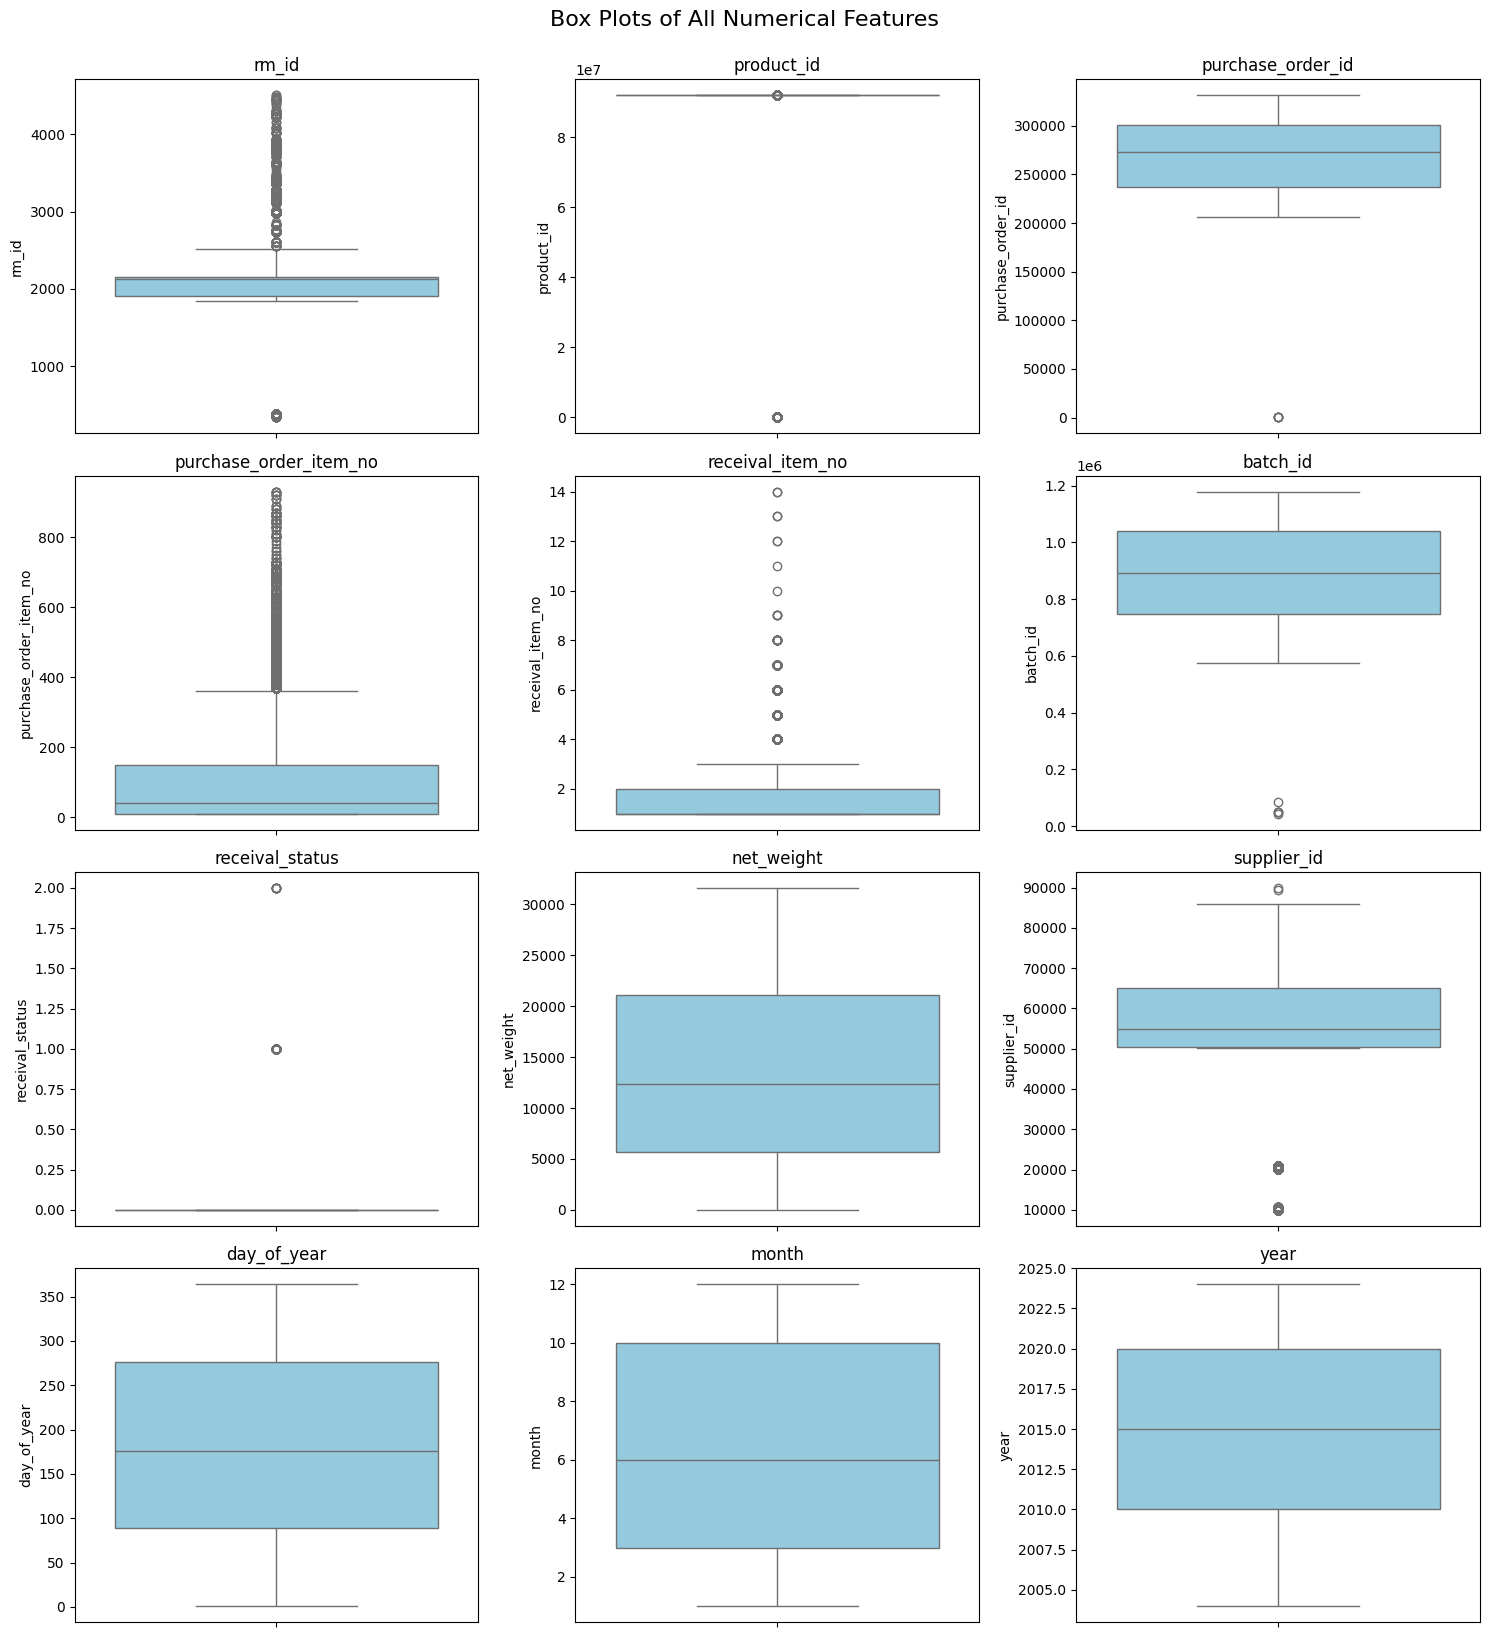

In [29]:
# Select numerical features
numeric_cols = df_receivals.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_receivals[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

## LIST OF ALL RM_IDS

In [30]:
## code that gives a list of all unique rm_ids
unique_rm_ids = df_receivals['rm_id'].unique() 

## DISTRIBUTION OF RM_ID 2197 PER YEAR

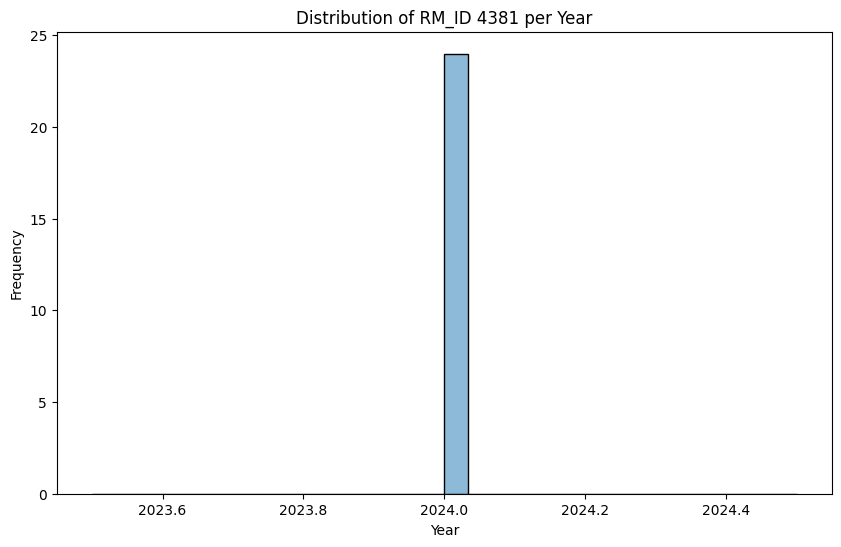

In [31]:
# distribution of rm_id 2197 per year
df_2197 = df_receivals[df_receivals['rm_id'] == 4222]
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_2197, x='year', bins=30, kde=True)
plt.title('Distribution of RM_ID 4381 per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## FIND ALL THE UNIQUE RM_IDS THAT HAVE ROWS REGISTERED IN 2024

In [32]:
# FIND ALL THE UNIQUE RM_IDS THAT HAVE ROWS REGISTERED IN 2020 OR LATER
#unique_rm_ids_2024 = df_receivals[df_receivals['year'] >= 2024]['rm_id'].unique()

## REMOVE ALL ROWS THAT HAVE RM_IDS THAT AREN'T IN unique_rm_ids_2024

In [33]:
# REMOVE ALL ROWS THAT HAVE RM_IDS THAT AREN'T IN unique_rm_ids_2020
#df_receivals = df_receivals[df_receivals['rm_id'].isin(unique_rm_ids_2024)].reset_index(drop=True)

## RM_ID COUNT 

In [34]:
# count of rm_id occurrences
rm_id_counts = df_receivals['rm_id'].value_counts().reset_index()
rm_id_counts.columns = ['rm_id', 'count']
print(rm_id_counts)

      rm_id  count
0    2130.0  23620
1    1903.0  19337
2    2160.0  13507
3    2140.0   5343
4    2142.0   4624
..      ...    ...
198  4343.0      1
199  4381.0      1
200  4461.0      1
201  4463.0      1
202  4462.0      1

[203 rows x 2 columns]


## check rows where cum_weight_year > 2.5e7

In [35]:
#high_cum_weight = df_receivals[df_receivals['cum_weight_per_year'] > 2.0e7]

## SINCE SOME OF THE RM_ID HAVE VERY SHORT COUNTS, CREATE A PROBABILITY FEATURE

In [36]:
# Total number of rows (all purchases)
total_rows = len(df_receivals)

# Probability of purchase per RM_ID
rm_id_counts['purchase_prob'] = rm_id_counts['count'] / total_rows

# Merge this probability back into df_rec_purchase
df_receivals = df_receivals.merge(
    rm_id_counts[['rm_id', 'purchase_prob']],
    on='rm_id',
    how='left'
)


## CORRELATION

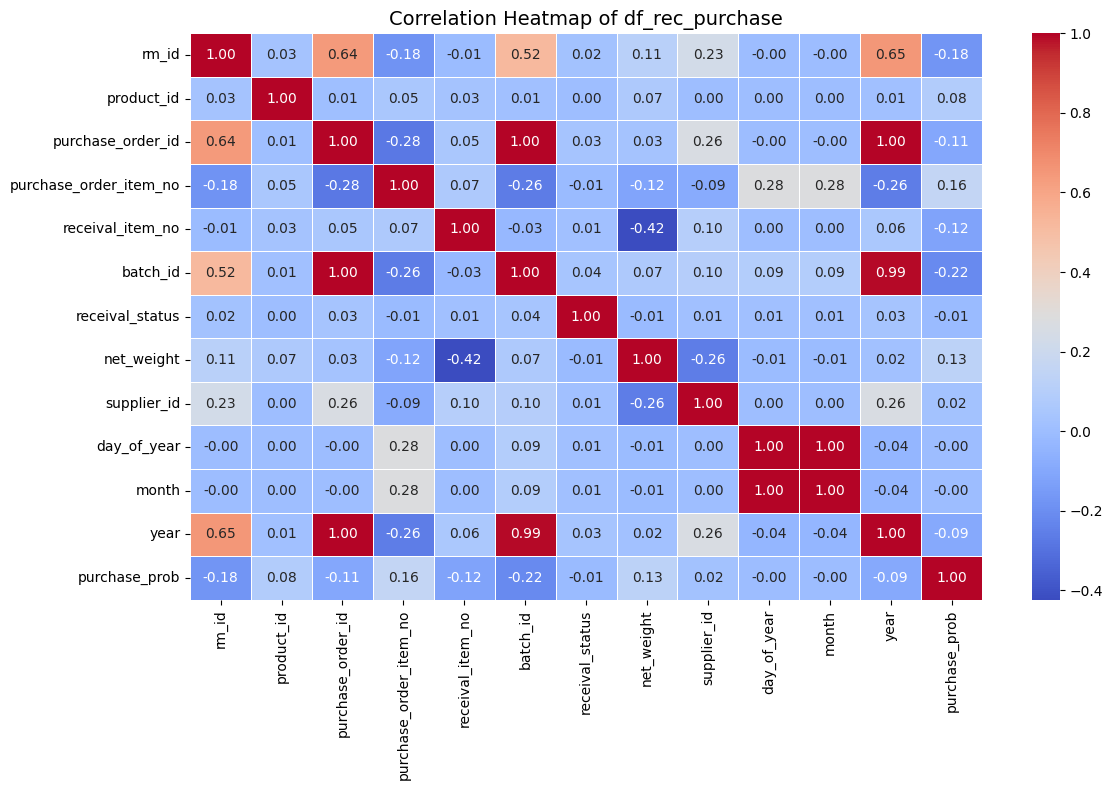

In [37]:
# Compute correlation matrix
corr = df_receivals.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of df_rec_purchase", fontsize=14)
plt.tight_layout()
plt.show()

## save to csv

In [38]:
# save to csv
df_receivals.to_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\processed_receivals.csv', index=False)    

## EDA JUST FOR PURCHASE_ORDERS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_receivals = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\processed_receivals.csv')
df_purchase = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\purchase_orders.csv')

## INFO

In [3]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_order_id       33171 non-null  int64  
 1   purchase_order_item_no  33171 non-null  int64  
 2   quantity                33171 non-null  float64
 3   delivery_date           33171 non-null  object 
 4   product_id              33171 non-null  int64  
 5   product_version         33171 non-null  int64  
 6   created_date_time       33171 non-null  object 
 7   modified_date_time      32679 non-null  object 
 8   unit_id                 33127 non-null  float64
 9   unit                    33127 non-null  object 
 10  status_id               33171 non-null  int64  
 11  status                  33171 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ MB


## DROP NON-INTUITIONAL OR FEATURES WITH NA OR FEATURES THAT ALREADY HAVE INDEXED FEATURES AND DO NOT NEED FURTHER CHANGES

In [4]:
# drop modified_date as it has too many NA values
df_purchase = df_purchase.drop(columns=['modified_date_time', 'status', 'created_date_time'])
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_order_id       33171 non-null  int64  
 1   purchase_order_item_no  33171 non-null  int64  
 2   quantity                33171 non-null  float64
 3   delivery_date           33171 non-null  object 
 4   product_id              33171 non-null  int64  
 5   product_version         33171 non-null  int64  
 6   unit_id                 33127 non-null  float64
 7   unit                    33127 non-null  object 
 8   status_id               33171 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.3+ MB


## GETTING THESE FEATURES TO DF_RECEIVALS AS NOW NO ROWS HAVE NA VALUES

In [5]:
# Keys to merge on
key_cols = ['purchase_order_id', 'purchase_order_item_no', 'product_id']

# Convert df_receivals key columns to int64 to match df_purchase
for col in key_cols:
    df_receivals[col] = df_receivals[col].astype(int)
    df_purchase[col] = df_purchase[col].astype(int)

# Columns to bring from df_purchase
cols_to_merge = key_cols + ['quantity', 'delivery_date', 'product_version', 'unit_id', 'unit', 'status_id']

# Merge df_purchase onto df_receivals
df_receivals = df_receivals.merge(
    df_purchase[cols_to_merge],
    on=key_cols,
    how='left'
)

df_receivals.info()
df_copy = df_receivals.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122520 entries, 0 to 122519
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122520 non-null  float64
 1   product_id              122520 non-null  int64  
 2   purchase_order_id       122520 non-null  int64  
 3   purchase_order_item_no  122520 non-null  int64  
 4   receival_item_no        122520 non-null  int64  
 5   batch_id                64703 non-null   float64
 6   date_arrival            122520 non-null  object 
 7   receival_status         122520 non-null  int64  
 8   net_weight              122520 non-null  float64
 9   supplier_id             122520 non-null  int64  
 10  day_of_year             122520 non-null  int64  
 11  month                   122520 non-null  int64  
 12  year                    122520 non-null  int64  
 13  purchase_prob           122520 non-null  float64
 14  quantity            

## EVALUATE IF DELIVERY_DATE IS EQUAL TO DATE_ARRIVAL ON EACH ROW. OBS: HAVE TO REMOVE TIMEZONE AND TIME FROM DELIVERY_DATE, ONLY WANT DATE ON THAT.

In [6]:
# Convert delivery_date to datetime, remove timezone, and keep only date
df_receivals['delivery_date'] = pd.to_datetime(
    df_receivals['delivery_date'], errors='coerce', utc=True
).dt.tz_convert(None).dt.date

# Convert date_arrival to datetime and take only date (if not already)
df_receivals['date_arrival'] = pd.to_datetime(
    df_receivals['date_arrival'], errors='coerce'
).dt.date

# Compare
df_receivals['delivery_equals_arrival'] = df_receivals['delivery_date'] == df_receivals['date_arrival']

# Check results
print(df_receivals[['delivery_date', 'date_arrival', 'delivery_equals_arrival']].head())
print(f"Number of matching dates: {df_receivals['delivery_equals_arrival'].sum()} / {len(df_receivals)}")



  delivery_date date_arrival  delivery_equals_arrival
0    2004-05-30   2004-06-23                    False
1    2006-12-30   2005-03-29                    False
2    2004-12-30   2004-09-01                    False
3    2004-12-30   2004-06-24                    False
4    2004-12-30   2004-06-30                    False
Number of matching dates: 4136 / 122520


## DROP DELIVERY_DATE

In [7]:
# drop delivery_date
df_receivals = df_receivals.drop(columns=['delivery_date', 'delivery_equals_arrival'])
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122520 entries, 0 to 122519
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122520 non-null  float64
 1   product_id              122520 non-null  int64  
 2   purchase_order_id       122520 non-null  int64  
 3   purchase_order_item_no  122520 non-null  int64  
 4   receival_item_no        122520 non-null  int64  
 5   batch_id                64703 non-null   float64
 6   date_arrival            122520 non-null  object 
 7   receival_status         122520 non-null  int64  
 8   net_weight              122520 non-null  float64
 9   supplier_id             122520 non-null  int64  
 10  day_of_year             122520 non-null  int64  
 11  month                   122520 non-null  int64  
 12  year                    122520 non-null  int64  
 13  purchase_prob           122520 non-null  float64
 14  quantity            

## SHOW ALL THE ROWS THAT HAVE NULL VALUES 

In [8]:
# Rows with any null values
null_rows = df_receivals[df_receivals.isnull().any(axis=1)]

# Show them
print(null_rows)


         rm_id  product_id  purchase_order_id  purchase_order_item_no  \
0        342.0    91900170             210274                      20   
1        343.0    91900143             212977                      10   
2        345.0    91900143             208537                      10   
3        346.0    91900146             208545                      20   
4        346.0    91900146             208532                      30   
...        ...         ...                ...                     ...   
122211  3883.0    91900471             321317                      30   
122388  3901.0    91901440             329980                      10   
122483  4401.0    91901370             327819                      10   
122484  4401.0    91901370             327819                      20   
122485  4401.0    91901370             327819                      30   

        receival_item_no   batch_id date_arrival  receival_status  net_weight  \
0                      1        NaN   2004

## REMOVE UNIT AND UNIT_ID AS THEY ALL JUST SHOW KG ANYWAYS

In [9]:
# DROP UNIT AND UNIT_ID AS THEY ALL JUST SHOW KG ANYWAYS
df_receivals = df_receivals.drop(columns=['unit', 'unit_id'])
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122520 entries, 0 to 122519
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122520 non-null  float64
 1   product_id              122520 non-null  int64  
 2   purchase_order_id       122520 non-null  int64  
 3   purchase_order_item_no  122520 non-null  int64  
 4   receival_item_no        122520 non-null  int64  
 5   batch_id                64703 non-null   float64
 6   date_arrival            122520 non-null  object 
 7   receival_status         122520 non-null  int64  
 8   net_weight              122520 non-null  float64
 9   supplier_id             122520 non-null  int64  
 10  day_of_year             122520 non-null  int64  
 11  month                   122520 non-null  int64  
 12  year                    122520 non-null  int64  
 13  purchase_prob           122520 non-null  float64
 14  quantity            

## USE MICE TO FILL THE MISSING VALUES

In [10]:
#from sklearn.experimental import enable_iterative_imputer  # noqa: F401
#from sklearn.impute import IterativeImputer
#import numpy as np

# Define and apply the imputer
#imputer = IterativeImputer(random_state=0)
#imputed_data = imputer.fit_transform(df_receivals[['quantity', 'product_version', 'status_id']])

# Assign imputed values back
#df_receivals[['quantity', 'product_version', 'status_id']] = imputed_data

# ✅ Round all three columns to nearest whole number but keep as float
#cols_to_round = ['quantity', 'product_version', 'status_id']
#df_receivals[cols_to_round] = np.round(df_receivals[cols_to_round], 0).astype(float)

# Check result
#df_receivals.info()

## DROP ROWS WITH NA VALUES

In [11]:
# DROP ROWS WITH NA VALUES
df_receivals = df_receivals.dropna()
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64167 entries, 20 to 122519
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rm_id                   64167 non-null  float64
 1   product_id              64167 non-null  int64  
 2   purchase_order_id       64167 non-null  int64  
 3   purchase_order_item_no  64167 non-null  int64  
 4   receival_item_no        64167 non-null  int64  
 5   batch_id                64167 non-null  float64
 6   date_arrival            64167 non-null  object 
 7   receival_status         64167 non-null  int64  
 8   net_weight              64167 non-null  float64
 9   supplier_id             64167 non-null  int64  
 10  day_of_year             64167 non-null  int64  
 11  month                   64167 non-null  int64  
 12  year                    64167 non-null  int64  
 13  purchase_prob           64167 non-null  float64
 14  quantity                64167 non-null  f

## BOX-PLOTS

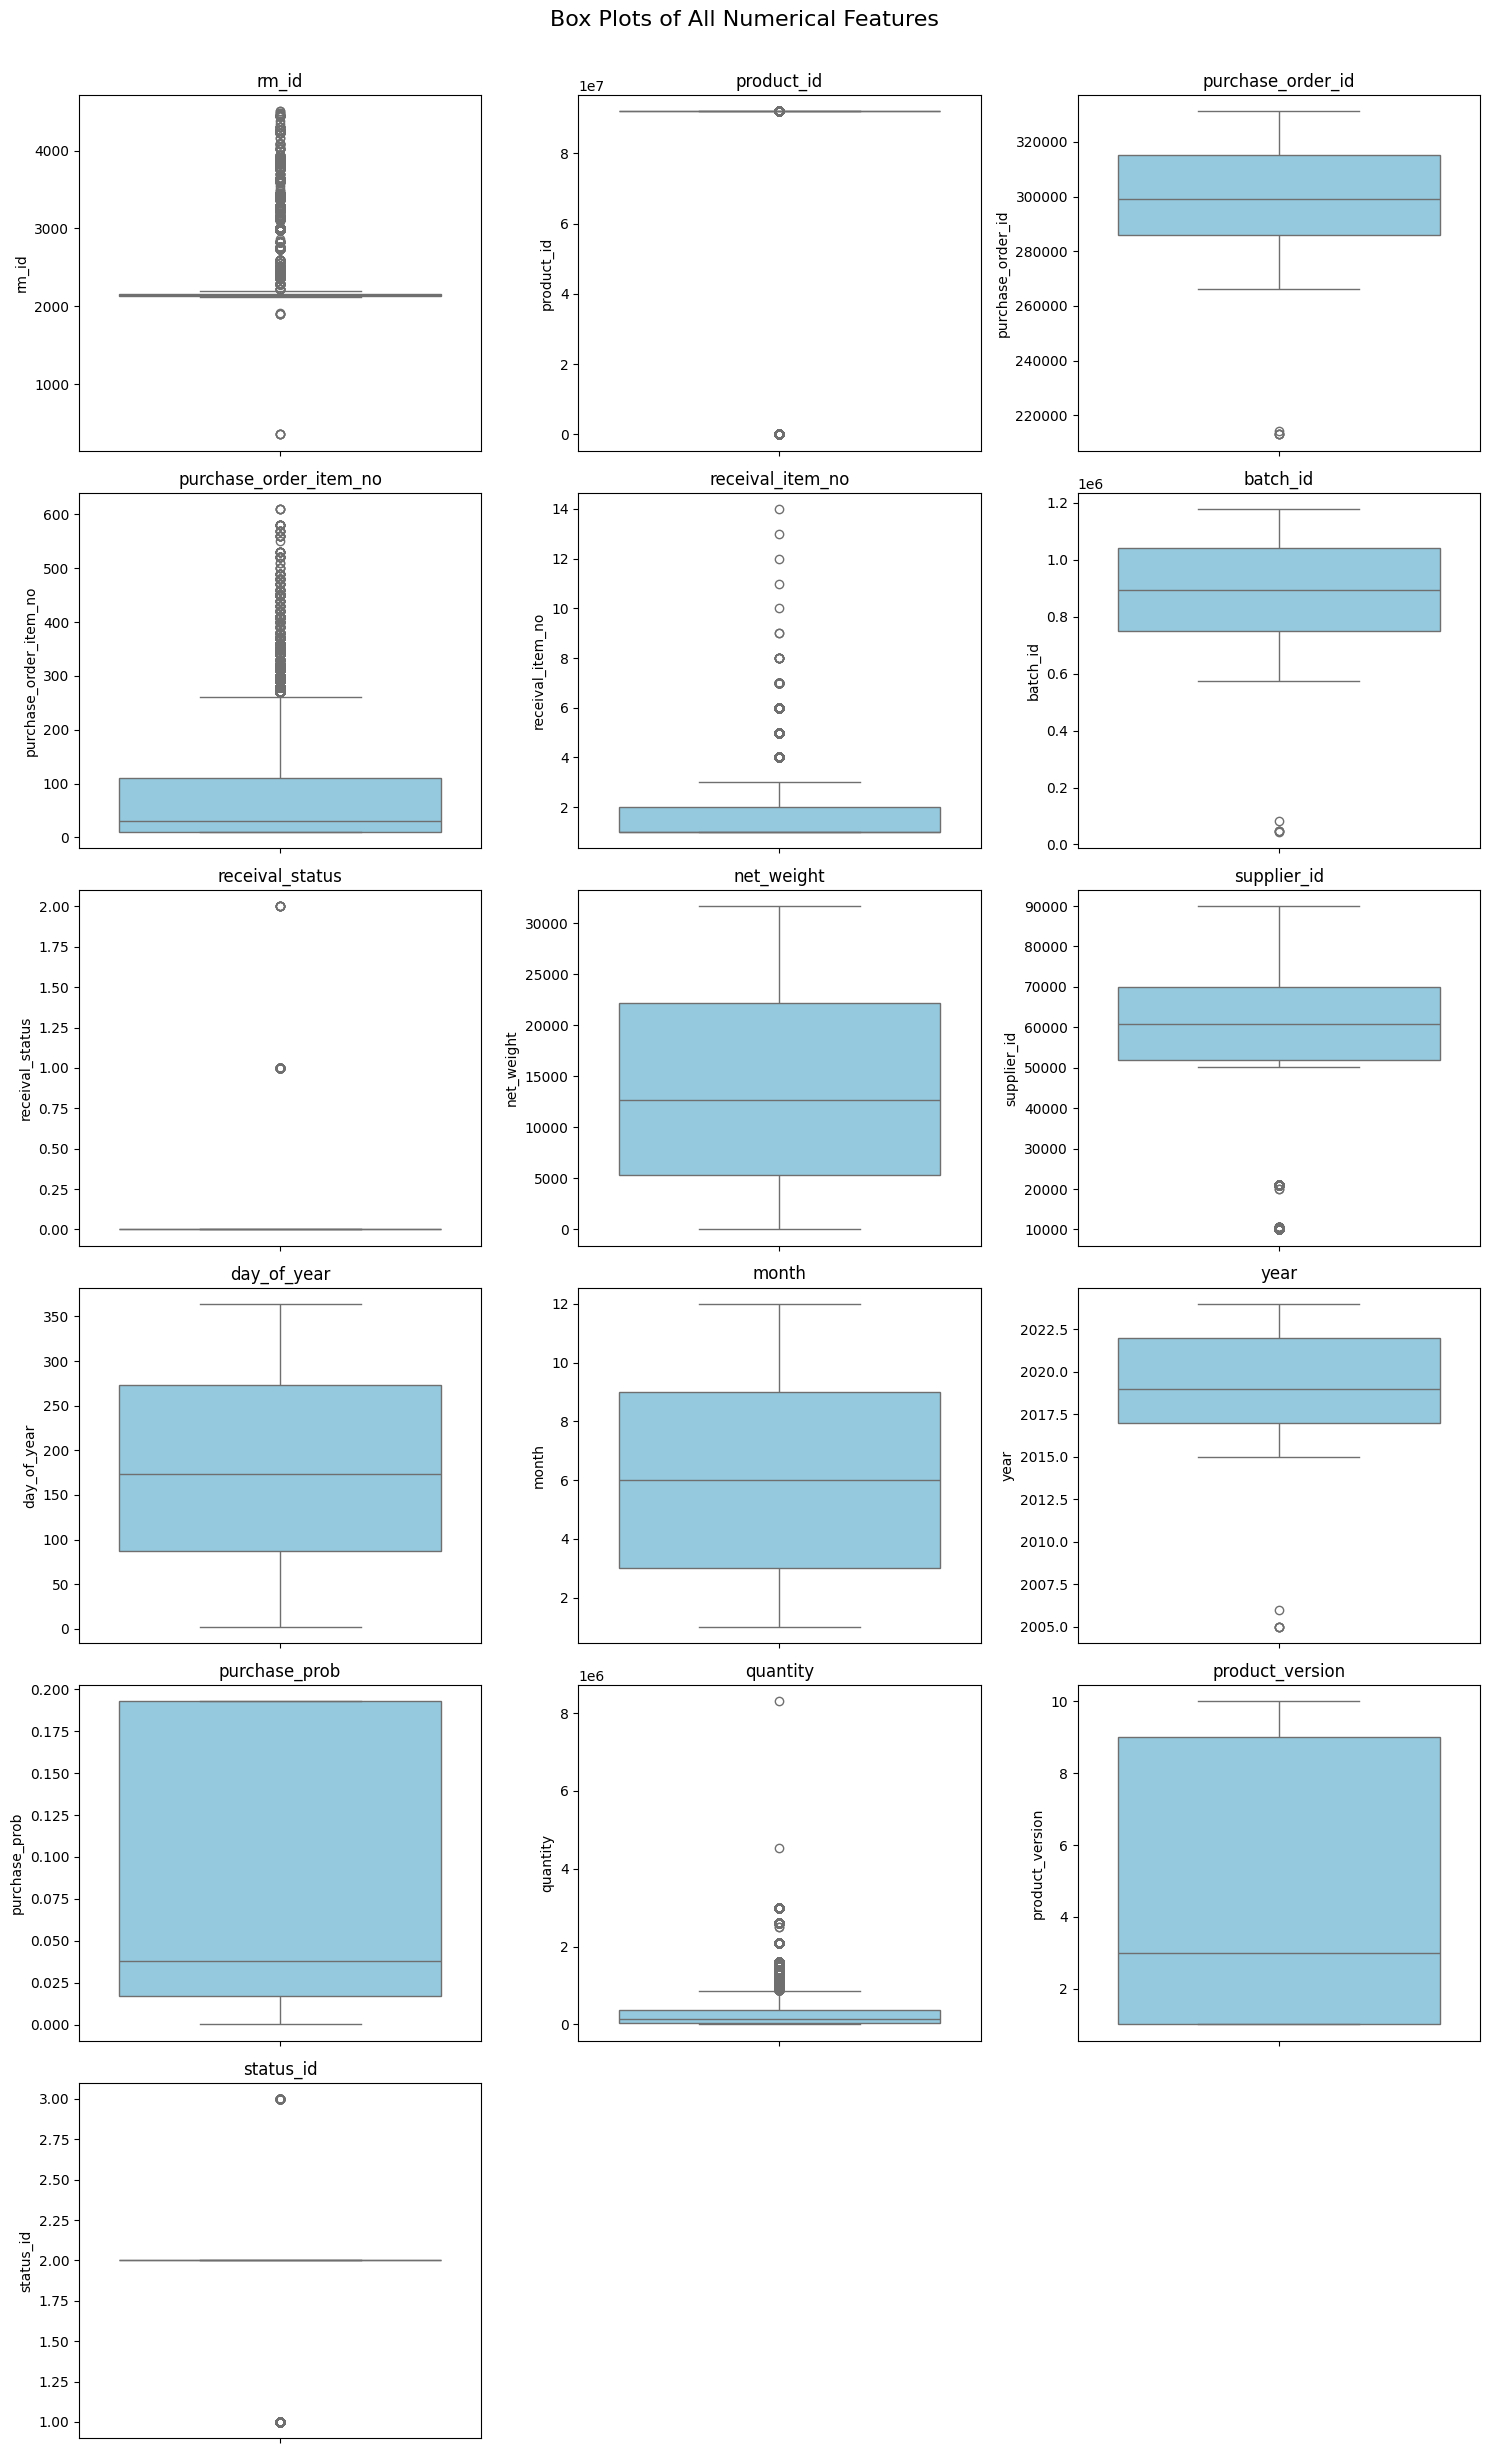

In [12]:
# Select numerical features
numeric_cols = df_receivals.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_receivals[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

## CORRELATION FOR NUMERICAL FEATURES

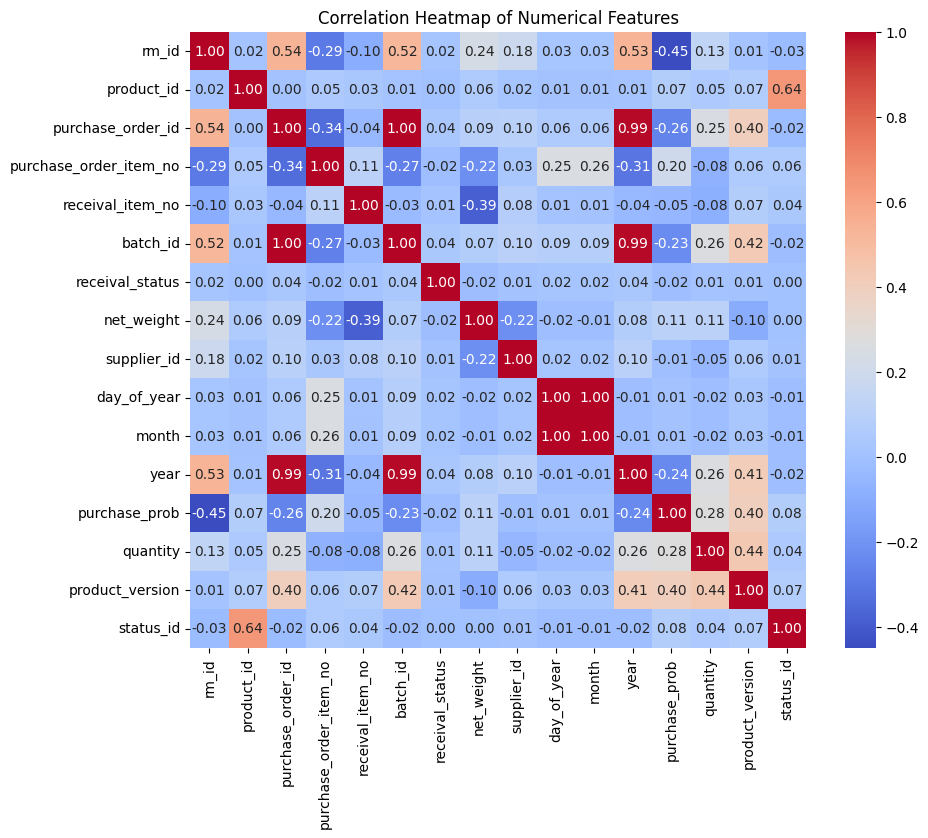

In [13]:
# correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_receivals[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## ALSO INCLUDING A DF_COPY AS A BACKUP IN CASE WE ARE NOT USING EITHER MATERIALS OR TRANSPORT

In [14]:
df_copy.drop(columns=['batch_id', 'unit', 'unit_id', 'purchase_order_id', 'purchase_order_item_no', 'delivery_date'], inplace=True)
df_copy.dropna(inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118580 entries, 0 to 122519
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rm_id             118580 non-null  float64
 1   product_id        118580 non-null  int64  
 2   receival_item_no  118580 non-null  int64  
 3   date_arrival      118580 non-null  object 
 4   receival_status   118580 non-null  int64  
 5   net_weight        118580 non-null  float64
 6   supplier_id       118580 non-null  int64  
 7   day_of_year       118580 non-null  int64  
 8   month             118580 non-null  int64  
 9   year              118580 non-null  int64  
 10  purchase_prob     118580 non-null  float64
 11  quantity          118580 non-null  float64
 12  product_version   118580 non-null  float64
 13  status_id         118580 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 13.6+ MB


## SAVE TO CSV

In [15]:
# SAVE TO CSV
df_receivals.to_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\purchase_receivals.csv')
df_copy.to_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\copy_purchase_receivals.csv')

## ALSO FEATURE ENGINEERING AND PREDICTIONS BUT NOW DOING IT BY PREDICTING NET_WEIGHT BY ROW AND THEN DOING THE CUMULATIVE SUM AFTER

In [1]:
# ============================================================
# 0. Imports & Setup
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay

In [2]:
prediction_mapping = pd.read_csv("C:\\Users\\bupat\\OneDrive\\Documentos\\NTNU\\modern_ml_in_practice\\append_consulting_project\\data\\prediction_mapping.csv")
#df_rec_purchase = pd.read_csv("C:\\Users\\bupat\\OneDrive\\Documentos\\NTNU\\modern_ml_in_practice\\append_consulting_project\\data\\kernel\\cleaned_receivals.csv")
df_rec_purchase = pd.read_csv("C:\\Users\\bupat\\OneDrive\\Documentos\\NTNU\\modern_ml_in_practice\\append_consulting_project\\data\\kernel\\copy_purchase_receivals.csv")

print("Files loaded successfully!")
print("\n--- prediction_mapping ---")
print(prediction_mapping.head())

print("\n--- df_rec_purchase ---")
print(df_rec_purchase.head())

Files loaded successfully!

--- prediction_mapping ---
   ID  rm_id forecast_start_date forecast_end_date
0   1    365          2025-01-01        2025-01-02
1   2    365          2025-01-01        2025-01-03
2   3    365          2025-01-01        2025-01-04
3   4    365          2025-01-01        2025-01-05
4   5    365          2025-01-01        2025-01-06

--- df_rec_purchase ---
   Unnamed: 0  rm_id  product_id  receival_item_no date_arrival  \
0           0  342.0    91900170                 1   2004-06-23   
1           1  343.0    91900143                 1   2005-03-29   
2           2  345.0    91900143                 1   2004-09-01   
3           3  346.0    91900146                 3   2004-06-24   
4           4  346.0    91900146                 1   2004-06-30   

   receival_status  net_weight  supplier_id  day_of_year  month  year  \
0                0     24940.0        52433          175      6  2004   
1                0     21760.0        54748           88      3  

## DROP UNIT_STATUS, STATUS_ID AND RECEIVAL_STATUS AS THESE ARE MAINLY JUST ONE VALUE AND HAVE VERY LITTLE CORRELATION TO TARGET VALUE

In [3]:
# DROP UNIT_STATUS, STATUS_ID AND RECEIVAL_STATUS AS THESE ARE MAINLY JUST ONE VALUE AND HAVE VERY LITTLE CORRELATION TO TARGET VALUE
df_rec_purchase = df_rec_purchase.drop(columns=[#'unit_status', 
                                                'status_id', 
                                                'receival_status']) 

## GETTING JUST ONE ROW PER DAY PER RM_ID AND DATE. SO SUM NET_WEIGHT, TARE_WEIGHT, GROSS_WEIGHT, QUANTITY, IMPURITY_DEDUCTION_WEIGHT. THEN DO AVERAGE OF VEHICLE START AND END_WEIGHT THAT DATE, NOW WHAT TO DO FOR CATEGORICAL FEATURES SUPPLIER_ID, VEHICLE_NO, PRODUCT_VERSION, RECEIVAL_ITEM_NO AND PRODUCT_ID? ALSO WHEN JUST HAVING THIS 1 ROW, KEEP RM_ID, YEAR, DAY_OF_YEAR, MONTH, DATE_ARRIVAL AND PURCHASE_PROB FEATURES

In [4]:
# Define aggregation dictionary
agg_dict = {
    # Summed numeric totals
    'net_weight': 'sum',
    #'tare_weight': 'sum',
    #'gross_weight': 'sum',
    'quantity': 'sum',
    #'impurity_deduction_weight': 'sum',

    # Averages
    #'vehicle_start_weight': 'mean',
    #'vehicle_end_weight': 'mean',
    'product_version': 'mean',
    'receival_item_no': 'mean',

    # Categorical / ID handling
    'product_id': 'first',
    'supplier_id': 'nunique',
    #'vehicle_no': 'nunique',

    # Keep this as reference (likely constant)
    #'purchase_prob': 'first'
}

# Perform daily aggregation per rm_id
df_daily = (
    df_rec_purchase.groupby(['rm_id', 'year', 'day_of_year', 'month', 'date_arrival'], as_index=False)
      .agg(agg_dict)
)

df_rec_purchase = df_daily.copy()

print("✅ Aggregated dataset shape:", df_daily.shape)
print(df_daily.head())


✅ Aggregated dataset shape: (40705, 11)
   rm_id  year  day_of_year  month date_arrival  net_weight   quantity  \
0  342.0  2004          175      6   2004-06-23     24940.0    52000.0   
1  343.0  2005           88      3   2005-03-29     21760.0  4530000.0   
2  345.0  2004          245      9   2004-09-01     22780.0  6575000.0   
3  346.0  2004          176      6   2004-06-24       820.0   335550.0   
4  346.0  2004          182      6   2004-06-30     21260.0   600000.0   

   product_version  receival_item_no  product_id  supplier_id  
0              1.0               1.0    91900170            1  
1              1.0               1.0    91900143            1  
2              1.0               1.0    91900143            1  
3              1.0               3.0    91900146            1  
4              1.0               1.0    91900146            1  


### NOW FILL THE WHOLE DATASET WITH ALL POSSIBLE DATES FROM MIN DATE TO MAX DATE, FOR ALL RM_IDS IN THE DATASET. TAKE INTO ACCOUNT THAT SOME OF THE DATES OF COURSE ALREADY EXIST SO DO NOT FILL THOSE, AND PUT JUST THE RM_ID, DAY_OF_YEAR, MONTH AND YEAR AS VALUES AND THE REST OF THE FEATURES TO ZERO, EVEN NET_WEIGHT.

In [5]:
import pandas as pd
import numpy as np

# ============================================================
# 0️⃣ Ensure date_arrival is datetime
# ============================================================
df_rec_purchase['date_arrival'] = pd.to_datetime(df_rec_purchase['date_arrival'], errors='coerce')

# ============================================================
# 1️⃣ Prepare date range and RM_ID list
# ============================================================
min_date = df_rec_purchase['date_arrival'].min()
max_date = df_rec_purchase['date_arrival'].max()

print(f"📅 Expanding dates from {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")

all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
all_rm_ids = df_rec_purchase['rm_id'].unique()

# ============================================================
# 2️⃣ Create full RM_ID × date grid
# ============================================================
full_index = pd.MultiIndex.from_product(
    [all_rm_ids, all_dates],
    names=['rm_id', 'date_arrival']
)
full_df = pd.DataFrame(index=full_index).reset_index()

# ============================================================
# 3️⃣ Merge original dataset onto full grid
# ============================================================
df_expanded = full_df.merge(df_rec_purchase, on=['rm_id', 'date_arrival'], how='left')

# ============================================================
# 4️⃣ Fill derived date parts
# ============================================================
df_expanded['year'] = df_expanded['date_arrival'].dt.year
df_expanded['month'] = df_expanded['date_arrival'].dt.month
df_expanded['day_of_year'] = df_expanded['date_arrival'].dt.dayofyear

# ============================================================
# 5️⃣ Fill missing numeric features with 0
# ============================================================
numeric_cols = df_rec_purchase.select_dtypes(include=[np.number]).columns.tolist()
df_expanded[numeric_cols] = df_expanded[numeric_cols].fillna(0)

# ============================================================
# 6️⃣ Sort and finalize
# ============================================================
df_expanded = df_expanded.sort_values(['rm_id', 'date_arrival']).reset_index(drop=True)
df_rec_purchase = df_expanded.copy()

print("✅ Expanded dataset created successfully!")
print(f"Shape: {df_rec_purchase.shape}")
print(df_rec_purchase.head())


📅 Expanding dates from 2004-06-15 to 2024-12-19
✅ Expanded dataset created successfully!
Shape: (1423670, 11)
   rm_id date_arrival  year  day_of_year  month  net_weight  quantity  \
0  342.0   2004-06-15  2004          167      6         0.0       0.0   
1  342.0   2004-06-16  2004          168      6         0.0       0.0   
2  342.0   2004-06-17  2004          169      6         0.0       0.0   
3  342.0   2004-06-18  2004          170      6         0.0       0.0   
4  342.0   2004-06-19  2004          171      6         0.0       0.0   

   product_version  receival_item_no  product_id  supplier_id  
0              0.0               0.0         0.0          0.0  
1              0.0               0.0         0.0          0.0  
2              0.0               0.0         0.0          0.0  
3              0.0               0.0         0.0          0.0  
4              0.0               0.0         0.0          0.0  


## CREATE CUM_WEIGHT_YEAR

In [6]:
# create feature cum_weight_per_year for each of the rm_id per year until that day_of_year, counting the net_weight of that day_of_year
df_rec_purchase['cum_weight_per_year'] = df_rec_purchase.groupby(['rm_id', 'year'])['net_weight'].cumsum()

## BOX-PLOT

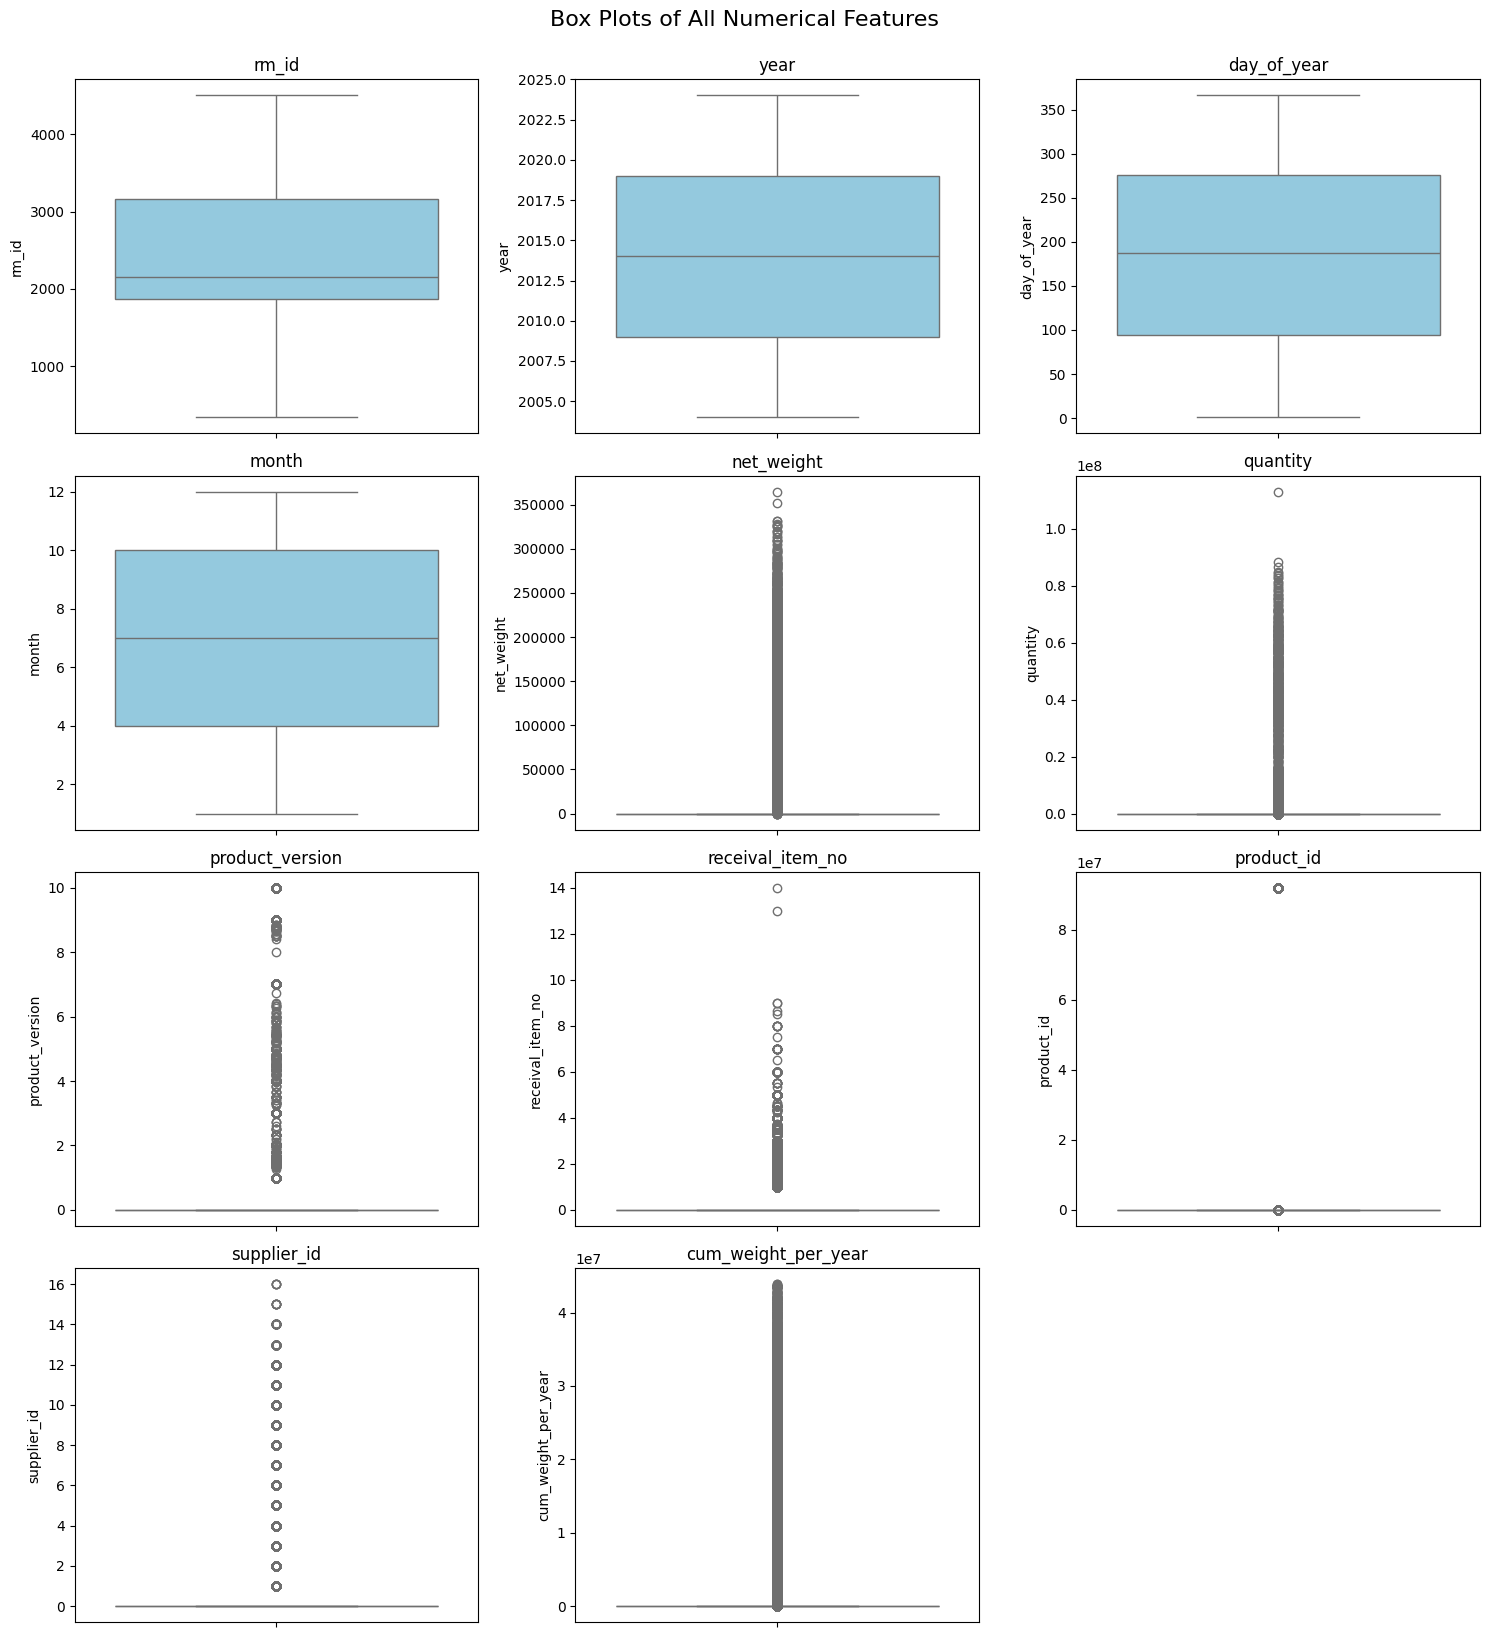

In [7]:
# Select numerical features
numeric_cols = df_rec_purchase.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_rec_purchase[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

## RM_IDS PER YEAR

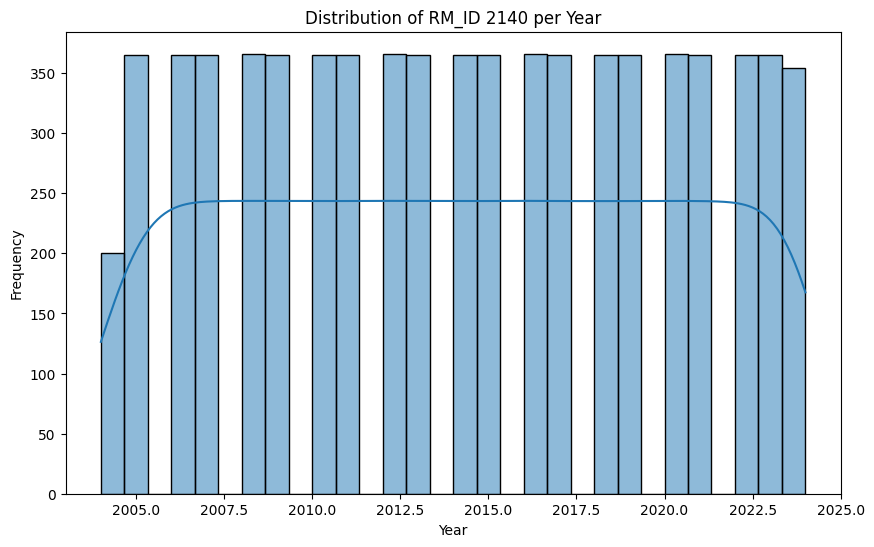

In [8]:
# distribution of rm_id 2140 per year
df_2140 = df_rec_purchase[df_rec_purchase['rm_id'] == 2140]
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_2140, x='year', bins=30, kde=True)
plt.title('Distribution of RM_ID 2140 per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## PLOT NET_WEIGHT PER MONTH FOR YEARS 2024 AND 2016 FOR RM_ID = 2130 TO COMPARE

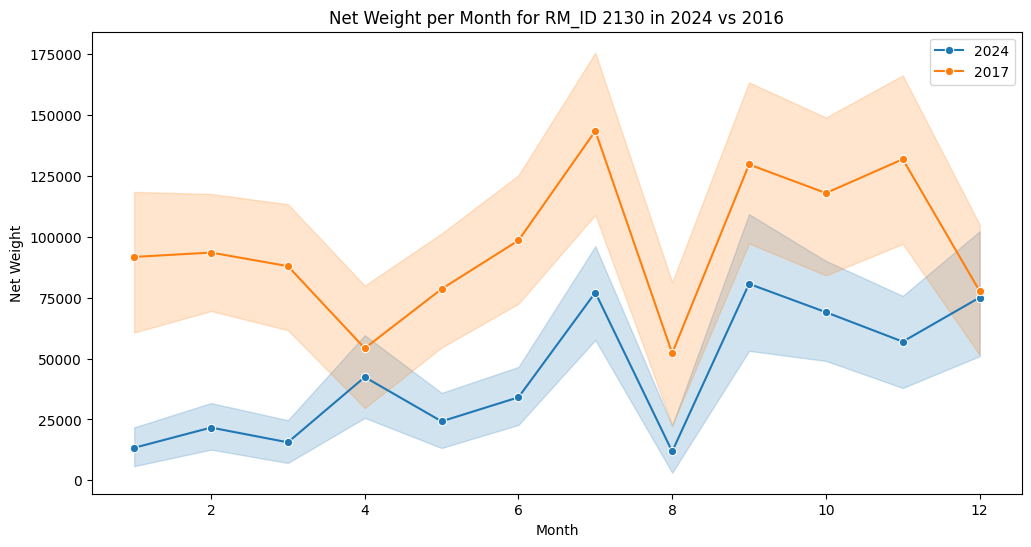

In [9]:
# PLOT NET_WEIGHT PER MONTH FOR YEARS 2024 AND 2016 FOR RM_ID = 2130 TO COMPARE
df_2130_2024 = df_rec_purchase[(df_rec_purchase['rm_id'] == 2130) & (df_rec_purchase['year'] == 2024)]
df_2130_2016 = df_rec_purchase[(df_rec_purchase['rm_id'] == 2130) & (df_rec_purchase['year'] == 2020)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2130_2024, x='month', y='net_weight', label='2024', marker='o')
sns.lineplot(data=df_2130_2016, x='month', y='net_weight', label='2017', marker='o')
plt.title('Net Weight per Month for RM_ID 2130 in 2024 vs 2016')
plt.xlabel('Month')
plt.ylabel('Net Weight')
plt.legend()
plt.show()

## REMOVE OUTLIERS BY REMOVING ROWS WITH NET_WEIGHT > 200000

In [10]:
# REMOVE OUTLIERS BY REMOVING ROWS WITH NET_WEIGHT > 200000
#df_rec_purchase = df_rec_purchase[df_rec_purchase['net_weight'] <= 200000]

## CORRELATION

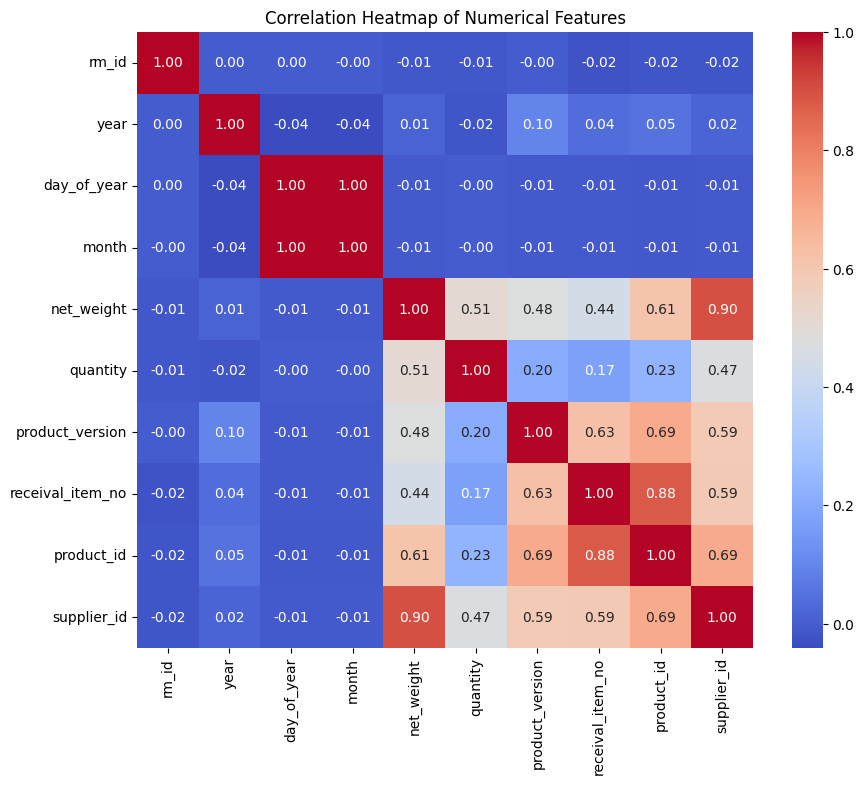

In [11]:
# correlation heatmap for numerical features
numeric_cols = [col for col in df_daily.columns if col != 'date_arrival']
plt.figure(figsize=(10, 8))
correlation_matrix = df_rec_purchase[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## REMOVE ROWS THAT HAVE RM_IDS WITH A COUNT OF 1

In [12]:
# REMOVE ROWS THAT HAVE RM_IDS WITH A COUNT OF 1
#rm_id_counts = df_rec_purchase['rm_id'].value_counts()
#df_rec_purchase = df_rec_purchase[df_rec_purchase['rm_id'].isin(rm_id_counts[rm_id_counts > 1].index)]
#print("✅ Dataset shape after removing rm_ids with single entries:", df_rec_purchase.shape)

## CREATE WEEK_OF_YEAR AND DAY_OF_WEEK

In [13]:
# Ensure date_arrival is datetime
df_rec_purchase['date_arrival'] = pd.to_datetime(df_rec_purchase['date_arrival'], errors='coerce')

# Extract week of year and day of week
df_rec_purchase['week_of_year'] = df_rec_purchase['date_arrival'].dt.isocalendar().week.astype(int)
df_rec_purchase['day_of_week'] = df_rec_purchase['date_arrival'].dt.weekday  # Monday=0, Sunday=6

## CREATE AVG_FEATURES PER RM_ID AND WEEKDAY, FOR EVERY FEATURE THATS NOT DAY_OF_YEAR, RM_ID, PURCHASE_PROB AND NET_WEIGHT

In [14]:
import pandas as pd

# ============================================================
# 1️⃣ Setup
# ============================================================
exclude_cols = ['rm_id', 'day_of_year', 'year', 'month', 'cum_weight_per_year']
numeric_cols = [c for c in df_rec_purchase.select_dtypes(include='number').columns if c not in exclude_cols + ['week_of_year', 'day_of_week']]

# Compute yearly means
yearly_avg = (
    df_rec_purchase
    .groupby(['rm_id', 'week_of_year', 'day_of_week', 'year'])[numeric_cols]
    .mean()
    .reset_index()
)

# ============================================================
# 2️⃣ Self-merge to bring in previous two years
# ============================================================
# Shift year by -1 (previous year) and -2 (two years before)
lag1 = yearly_avg.copy()
lag1['year'] += 1
lag1 = lag1.rename(columns={col: f'prev1_{col}' for col in numeric_cols})

lag2 = yearly_avg.copy()
lag2['year'] += 2
lag2 = lag2.rename(columns={col: f'prev2_{col}' for col in numeric_cols})

# Merge both lag datasets
merged = yearly_avg.merge(lag1, on=['rm_id', 'week_of_year', 'day_of_week', 'year'], how='left')
merged = merged.merge(lag2, on=['rm_id', 'week_of_year', 'day_of_week', 'year'], how='left')

# ============================================================
# 3️⃣ Compute strict 2-year average
# ============================================================
for col in numeric_cols:
    merged[f'avg_{col}'] = merged[[f'prev1_{col}', f'prev2_{col}']].mean(axis=1)

# ============================================================
# 4️⃣ Merge back to main df
# ============================================================
avg_cols = [f'avg_{c}' for c in numeric_cols]
df_rec_purchase = df_rec_purchase.merge(
    merged[['rm_id', 'week_of_year', 'day_of_week', 'year'] + avg_cols],
    on=['rm_id', 'week_of_year', 'day_of_week', 'year'],
    how='left'
)

print("✅ Strict 2-year average features created")
print(f"Shape: {df_rec_purchase.shape}")
print(df_rec_purchase.head())
# ============================================================
# ============================================================
#exclude_cols = ['rm_id', 'day_of_year', 'purchase_prob', 'year', 'month', 'day_of_year', 'cum_weight_per_year']

# ============================================================
# 2️⃣ Select numeric columns to average
# ============================================================
#numeric_cols = [
    #c for c in df_rec_purchase.select_dtypes(include='number').columns
    #if c not in exclude_cols + ['week_of_year', 'day_of_week']
#]

# ============================================================
# 3️⃣ Compute averages per (rm_id, week_of_year, day_of_week)
# ============================================================
#avg_df = (
    #df_rec_purchase
    #.groupby(['rm_id', 'week_of_year', 'day_of_week'])[numeric_cols]
    #.mean()
    #.reset_index()
#)

# Rename averaged columns with prefix
#avg_df = avg_df.rename(columns={c: f'avg_{c}' for c in numeric_cols})

# ============================================================
# 4️⃣ Merge averages back so all original rows remain
# ============================================================
#df_rec_purchase = df_rec_purchase.merge(
    #avg_df,
    #on=['rm_id', 'week_of_year', 'day_of_week'],
    #how='left'
#)

# ============================================================
# 5️⃣ Log info
# ============================================================
#print(df_rec_purchase.head())
#print(f"✅ df_rec_purchase shape: {df_rec_purchase.shape}")


#----------------------------------------------------------------------------------------
#AVERAGE PER DAY_OF_YEAR AND RM_ID
# Columns NOT to average
#exclude_cols = ['rm_id', 'day_of_year', 'purchase_prob', 'net_weight', 'year', 'month']

# Numeric columns to average
#numeric_cols = [c for c in df_rec_purchase.select_dtypes(include='number').columns if c not in exclude_cols]

# Compute averages per (rm_id, day_of_year)
#avg_df = df_rec_purchase.groupby(['rm_id', 'day_of_year'])[numeric_cols].mean().reset_index()
#avg_df = avg_df.rename(columns={c: f'avg_{c}' for c in numeric_cols})

# Merge averages back onto the original df so **all original rows remain**
#df_rec_purchase = df_rec_purchase.merge(avg_df, on=['rm_id', 'day_of_year'], how='left')

# Keep purchase_prob, net_weight, year, month as is
# (they were never removed)
#print(df_rec_purchase.head())
#print(f"✅ df_rec_purchase shape: {df_rec_purchase.shape}")

✅ Strict 2-year average features created
Shape: (1423670, 20)
   rm_id date_arrival  year  day_of_year  month  net_weight  quantity  \
0  342.0   2004-06-15  2004          167      6         0.0       0.0   
1  342.0   2004-06-16  2004          168      6         0.0       0.0   
2  342.0   2004-06-17  2004          169      6         0.0       0.0   
3  342.0   2004-06-18  2004          170      6         0.0       0.0   
4  342.0   2004-06-19  2004          171      6         0.0       0.0   

   product_version  receival_item_no  product_id  supplier_id  \
0              0.0               0.0         0.0          0.0   
1              0.0               0.0         0.0          0.0   
2              0.0               0.0         0.0          0.0   
3              0.0               0.0         0.0          0.0   
4              0.0               0.0         0.0          0.0   

   cum_weight_per_year  week_of_year  day_of_week  avg_net_weight  \
0                  0.0            25   

## lag feature

In [15]:
import pandas as pd

# ============================================================
# 0️⃣ Ensure proper ordering
# ============================================================
df_rec_purchase = df_rec_purchase.sort_values(['rm_id', 'date_arrival']).reset_index(drop=True)

# ============================================================
# 1️⃣ Compute lag features (1, 7, 30 days) within each rm_id
# ============================================================
lag_features = df_rec_purchase[['rm_id', 'year', 'week_of_year', 'day_of_week', 'cum_weight_per_year']].copy()

# Sort by rm_id and temporal order
lag_features = lag_features.sort_values(['rm_id', 'year', 'week_of_year', 'day_of_week'])

# Compute lags inside each rm_id
lag_features['lag1_cum_weight_per_year'] = lag_features.groupby('rm_id')['cum_weight_per_year'].shift(1)
lag_features['lag7_cum_weight_per_year'] = lag_features.groupby('rm_id')['cum_weight_per_year'].shift(7)
lag_features['lag30_cum_weight_per_year'] = lag_features.groupby('rm_id')['cum_weight_per_year'].shift(30)

# ============================================================
# 2️⃣ Create next-year alignment (shift forward one year)
# ============================================================
# Increment year to align previous-year lags with current-year rows
lag_features['year'] = lag_features['year'] + 1

# Rename columns to indicate they're from the previous year
lag_features = lag_features.rename(columns={
    'cum_weight_per_year': 'cum_weight_per_year_prev_year',
    'lag1_cum_weight_per_year': 'lag1_cum_weight_per_year_prev_year',
    'lag7_cum_weight_per_year': 'lag7_cum_weight_per_year_prev_year',
    'lag30_cum_weight_per_year': 'lag30_cum_weight_per_year_prev_year'
})

# Keep only needed columns
lag_features = lag_features[[
    'rm_id', 'year', 'week_of_year', 'day_of_week',
    'cum_weight_per_year_prev_year',
    'lag1_cum_weight_per_year_prev_year',
    'lag7_cum_weight_per_year_prev_year',
    'lag30_cum_weight_per_year_prev_year'
]]

# ============================================================
# 3️⃣ Merge all prev-year features into the main dataframe
# ============================================================
df_rec_purchase = df_rec_purchase.merge(
    lag_features,
    on=['rm_id', 'year', 'week_of_year', 'day_of_week'],
    how='left'
)

# ============================================================
# 4️⃣ (Optional) Drop old roll2yr feature if it exists
# ============================================================
if 'roll2yr_cum_weight_per_year' in df_rec_purchase.columns:
    df_rec_purchase = df_rec_purchase.drop(columns=['roll2yr_cum_weight_per_year'])
    print("Dropped old roll2yr_cum_weight_per_year column.")

# ============================================================
# 5️⃣ Quick check
# ============================================================
cols_show = [
    'rm_id', 'date_arrival', 'year', 'week_of_year', 'day_of_week',
    'cum_weight_per_year',
    'cum_weight_per_year_prev_year',
    'lag1_cum_weight_per_year_prev_year',
    'lag7_cum_weight_per_year_prev_year',
    'lag30_cum_weight_per_year_prev_year'
]

print("✅ Created cum_weight_per_year_prev_year + lag1, lag7, lag30 previous-year features.")
print(df_rec_purchase[cols_show].head(20))

✅ Created cum_weight_per_year_prev_year + lag1, lag7, lag30 previous-year features.
    rm_id date_arrival  year  week_of_year  day_of_week  cum_weight_per_year  \
0   342.0   2004-06-15  2004            25            1                  0.0   
1   342.0   2004-06-16  2004            25            2                  0.0   
2   342.0   2004-06-17  2004            25            3                  0.0   
3   342.0   2004-06-18  2004            25            4                  0.0   
4   342.0   2004-06-19  2004            25            5                  0.0   
5   342.0   2004-06-20  2004            25            6                  0.0   
6   342.0   2004-06-21  2004            26            0                  0.0   
7   342.0   2004-06-22  2004            26            1                  0.0   
8   342.0   2004-06-23  2004            26            2              24940.0   
9   342.0   2004-06-24  2004            26            3              24940.0   
10  342.0   2004-06-25  2004        

## CREATE ROLLING AVERAGES FOR MULTIPLE FEATURES

In [16]:
import pandas as pd


# ============================================================
# 1️⃣ Features to compute rolling 2-year averages for
# ============================================================
#rolling_features = [
    #'net_weight', 
    #'quantity', 
    #'supplier_id'
#]

# Ensure time-based features exist
#if 'week_of_year' not in df_rec_purchase.columns or 'day_of_week' not in df_rec_purchase.columns:
    #df_rec_purchase['date'] = pd.to_datetime(df_rec_purchase['date'], errors='coerce')
    #df_rec_purchase['week_of_year'] = df_rec_purchase['date'].dt.isocalendar().week.astype(int)
    #df_rec_purchase['day_of_week'] = df_rec_purchase['date'].dt.weekday

# ============================================================
# 2️⃣ Sort values properly before rolling
# ============================================================
#df_roll = df_rec_purchase.sort_values(['rm_id', 'week_of_year', 'day_of_week', 'year']).copy()

# ============================================================
# 3️⃣ Compute rolling means over last 2 years per RM_ID + week/day
# ============================================================
#for feat in rolling_features:
    #df_roll[f'roll2yr_{feat}'] = (
        #df_roll.groupby(['rm_id', 'week_of_year', 'day_of_week'])[feat]
        #.rolling(window=2, min_periods=1)
        #.mean()
        #.reset_index(level=[0,1,2], drop=True)
    #)

# ============================================================
# 4️⃣ Merge rolling averages back into df_rec_purchase
# ============================================================
#for feat in rolling_features:
    #df_rec_purchase[f'roll2yr_{feat}'] = df_roll[f'roll2yr_{feat}']

# ============================================================
# 5️⃣ Done
# ============================================================
#print(f"✅ df_rec_purchase shape with rolling 2-year features: {df_rec_purchase.shape}")
#print(df_rec_purchase.head())

#--------------------------------------------------------------------
#AVERAGE PER DAY_OF_YEAR AND RM_ID - 2 YEAR ROLLING AVERAGES
# Features to compute rolling averages for
#rolling_features = [
    #'net_weight', 
    #'gross_weight', 
    #'quantity', 
    #'impurity_deduction_weight',
    #'vehicle_start_weight', 
    #'vehicle_end_weight', 
    #'tare_weight', 
    #'supplier_id',
    #'vehicle_no'
#]

# Sort by RM_ID, day_of_year, year
#df_roll = df_rec_purchase.sort_values(['rm_id', 'day_of_year', 'year']).copy()

# Compute rolling averages
#for feat in rolling_features:
    #df_roll[f'roll2yr_{feat}'] = (
        #df_roll.groupby(['rm_id', 'day_of_year'])[feat]
        #.rolling(window=2, min_periods=1)  # last 2 years
        #.mean()
        #.reset_index(level=[0,1], drop=True)
    #)

# Merge rolling features into df_rec_purchase (already aligned by index)
#for feat in rolling_features:
    #df_rec_purchase[f'roll2yr_{feat}'] = df_roll[f'roll2yr_{feat}']

#print(f"✅ df_rec_purchase shape with rolling features: {df_rec_purchase.shape}")
#print(df_rec_purchase.head())

# ============================================================
# ============================================================
# NOW FIXED ROLLING AVERAGES PER WEEK_OF_YEAR AND DAY_OF_WEEK

#rolling_features = ['cum_weight_per_year']
#roll_results = []

#for feat in rolling_features:
    # 1️⃣ Yearly mean per (rm_id, week_of_year, day_of_week, year)
    #yearly = (
        #df_rec_purchase
        #.groupby(['rm_id', 'week_of_year', 'day_of_week', 'year'], as_index=False)[feat]
        #.mean()
        #.rename(columns={feat: 'yearly_mean'})
    #)

    # 2️⃣ Prepare previous year (Y-1) and two years before (Y-2)
    #prev1 = yearly.copy()
    #prev1['year'] += 1
    #prev1 = prev1.rename(columns={'yearly_mean': 'prev1_' + feat})

    #prev2 = yearly.copy()
    #prev2['year'] += 2
    #prev2 = prev2.rename(columns={'yearly_mean': 'prev2_' + feat})

    # 3️⃣ Merge both lags to current year
    #merged = yearly.merge(prev1, on=['rm_id', 'week_of_year', 'day_of_week', 'year'], how='left')
    #merged = merged.merge(prev2, on=['rm_id', 'week_of_year', 'day_of_week', 'year'], how='left')

    # 4️⃣ Compute strict 2-year average
    #merged['roll2yr_' + feat] = merged[[f'prev1_{feat}', f'prev2_{feat}']].mean(axis=1)

    #roll_results.append(merged[['rm_id', 'week_of_year', 'day_of_week', 'year', 'roll2yr_' + feat]])

# 5️⃣ Merge back into original dataset
#for df_roll_feat in roll_results:
    #df_rec_purchase = df_rec_purchase.merge(
        #df_roll_feat,
        #on=['rm_id', 'week_of_year', 'day_of_week', 'year'],
        #how='left'
    #)

#df_rec_purchase = df_rec_purchase.fillna(0)

#print(f"✅ df_rec_purchase shape with strict 2-year rolling features: {df_rec_purchase.shape}")
#print(df_rec_purchase.head())

## DROP PURCHASE_PROB AND CREATE NEW FEATURE PURCHASE_PROB WHICH GIVES THE AVERAGES OF PURCHASE_PROB FROM YEAR BEFORE IN: JANUARY TO JUNE (IF ROW AFTER JUNE) OR FROM JULY TO DECEMBER IF ROW IS JAN-JUN

In [17]:
# Copy main dataset
df = df_rec_purchase.copy()
df['date_arrival'] = pd.to_datetime(df['date_arrival'], errors='coerce')
df['year'] = df['date_arrival'].dt.year
df['month'] = df['date_arrival'].dt.month

# Purchase flag (1 if any purchase, else 0)
df['purchase_flag'] = (df['net_weight'] > 0).astype(int)

# --------------------------------------------------------
# 1️⃣ Monthly purchase probability per RM_ID
# --------------------------------------------------------
monthly_prob = (
    df.groupby(['rm_id', 'year', 'month'], as_index=False)
      .agg(
          total_days=('date_arrival', 'nunique'),
          days_with_purchase=('purchase_flag', 'sum')
      )
)
monthly_prob['purchase_prob'] = monthly_prob['days_with_purchase'] / monthly_prob['total_days']

# Month start for sorting & rolling
monthly_prob['month_start'] = pd.to_datetime(
    monthly_prob['year'].astype(str) + '-' + monthly_prob['month'].astype(str) + '-01'
)
monthly_prob = monthly_prob.sort_values(['rm_id', 'month_start'])

# --------------------------------------------------------
# 2️⃣ Rolling 3-month mean of purchase_prob (previous months only)
# --------------------------------------------------------
monthly_prob['prev_purchase_prob'] = (
    monthly_prob.groupby('rm_id')['purchase_prob']
    .apply(lambda x: x.shift(1).rolling(window=3, min_periods=3).mean())
    .reset_index(level=0, drop=True)
)

# --------------------------------------------------------
# 3️⃣ Drop early-year rows with NA (not enough 3-month history)
# --------------------------------------------------------
first_year = monthly_prob['year'].min()
monthly_prob.loc[monthly_prob['year'] == first_year, 'prev_purchase_prob'] = np.nan
monthly_prob = monthly_prob.dropna(subset=['prev_purchase_prob'])

# --------------------------------------------------------
# 4️⃣ Merge back to main df
# --------------------------------------------------------
df = df.merge(
    monthly_prob[['rm_id', 'year', 'month', 'prev_purchase_prob',
                  'days_with_purchase', 'total_days']],
    on=['rm_id', 'year', 'month'],
    how='left'
)

# --------------------------------------------------------
# 5️⃣ Cleanup
# --------------------------------------------------------
df = df.drop(columns=['purchase_flag'])
df_rec_purchase = df

# --------------------------------------------------------
# ✅ Preview
# --------------------------------------------------------
print(df_rec_purchase[['rm_id','date_arrival','year','month',
                       'days_with_purchase','total_days','prev_purchase_prob']].head(15))

    rm_id date_arrival  year  month  days_with_purchase  total_days  \
0   342.0   2004-06-15  2004      6                 NaN         NaN   
1   342.0   2004-06-16  2004      6                 NaN         NaN   
2   342.0   2004-06-17  2004      6                 NaN         NaN   
3   342.0   2004-06-18  2004      6                 NaN         NaN   
4   342.0   2004-06-19  2004      6                 NaN         NaN   
5   342.0   2004-06-20  2004      6                 NaN         NaN   
6   342.0   2004-06-21  2004      6                 NaN         NaN   
7   342.0   2004-06-22  2004      6                 NaN         NaN   
8   342.0   2004-06-23  2004      6                 NaN         NaN   
9   342.0   2004-06-24  2004      6                 NaN         NaN   
10  342.0   2004-06-25  2004      6                 NaN         NaN   
11  342.0   2004-06-26  2004      6                 NaN         NaN   
12  342.0   2004-06-27  2004      6                 NaN         NaN   
13  34

## DROP ROWS WITH NA VALUES, WHHICH ARE THE ONES IN 2004. MAKES NO DIFFERENCE AS THE ONES THAT ACTUALLY HAVE VALUES THERE DONT NEED TO BE PREDICTED FOR 2025. 

In [18]:
# DROP ROWS WITH NA VALUES
df_rec_purchase = df_rec_purchase.dropna()

## ADDING RATIO AND RELATIONSHIP FEATURES BETWEEN LAG AND ROLLING CUM_WEIGHT

In [19]:
import numpy as np

# ============================================================
# 1️⃣ Ensure required columns exist
# ============================================================
required_cols = ['lag1_cum_weight_per_year_prev_year', 'cum_weight_per_year_prev_year']
missing = [c for c in required_cols if c not in df_rec_purchase.columns]
if missing:
    raise KeyError(f"Missing required columns in df_rec_purchase: {missing}")

# ============================================================
# 2️⃣ Compute difference (delta) and ratio between lag and actual previous-year cumulative
# ============================================================
df_rec_purchase['delta_lastyear_vs_prevyear'] = (
    df_rec_purchase['lag7_cum_weight_per_year_prev_year'] -
    df_rec_purchase['cum_weight_per_year_prev_year']
)

df_rec_purchase['ratio_lastyear_over_prevyear'] = np.where(
    df_rec_purchase['cum_weight_per_year_prev_year'] != 0,
    df_rec_purchase['lag7_cum_weight_per_year_prev_year'] / df_rec_purchase['cum_weight_per_year_prev_year'],
    np.nan  # ✅ this is the missing "else" value — use np.nan or 0
)

# ============================================================
# 3️⃣ Inspect result
# ============================================================
print("✅ Added delta_lastyear_vs_prevyear and ratio_lastyear_over_prevyear to df_rec_purchase")
print(df_rec_purchase[['rm_id', 'year', 'week_of_year', 'day_of_week',
                       'cum_weight_per_year_prev_year',
                       'lag7_cum_weight_per_year_prev_year',
                       'delta_lastyear_vs_prevyear',
                       'ratio_lastyear_over_prevyear']].head(10))

✅ Added delta_lastyear_vs_prevyear and ratio_lastyear_over_prevyear to df_rec_purchase
     rm_id  year  week_of_year  day_of_week  cum_weight_per_year_prev_year  \
401  342.0  2005            29            3                        24940.0   
402  342.0  2005            29            4                        24940.0   
403  342.0  2005            29            5                        24940.0   
404  342.0  2005            29            6                        24940.0   
405  342.0  2005            30            0                        24940.0   
406  342.0  2005            30            1                        24940.0   
407  342.0  2005            30            2                        24940.0   
408  342.0  2005            30            3                        24940.0   
409  342.0  2005            30            4                        24940.0   
410  342.0  2005            30            5                        24940.0   

     lag7_cum_weight_per_year_prev_year  delta_lastyea

C:\Users\bupat\AppData\Local\Temp\ipykernel_14620\715533143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec_purchase['delta_lastyear_vs_prevyear'] = (
C:\Users\bupat\AppData\Local\Temp\ipykernel_14620\715533143.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec_purchase['ratio_lastyear_over_prevyear'] = np.where(


## TRYING TEMPORAL EFFECTS

In [20]:
df_rec_purchase['quarter'] = df_rec_purchase['date_arrival'].dt.quarter

# --- Cyclical encoding for periodic effects (sin/cos for continuous seasonality)
df_rec_purchase['sin_doy'] = np.sin(2 * np.pi * df_rec_purchase['day_of_year'] / 365)
df_rec_purchase['cos_doy'] = np.cos(2 * np.pi * df_rec_purchase['day_of_year'] / 365)

# ============================================================
# ✅ Print summary
# ============================================================
temporal_cols = [
    'year', 'week_of_year',
    'sin_doy', 'cos_doy'
]
print(f"✅ Added {len(temporal_cols)} temporal features.")
print("🧩 Temporal feature preview:")
display(df_rec_purchase[temporal_cols].head())

✅ Added 4 temporal features.
🧩 Temporal feature preview:


C:\Users\bupat\AppData\Local\Temp\ipykernel_14620\2441069943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec_purchase['quarter'] = df_rec_purchase['date_arrival'].dt.quarter
C:\Users\bupat\AppData\Local\Temp\ipykernel_14620\2441069943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec_purchase['sin_doy'] = np.sin(2 * np.pi * df_rec_purchase['day_of_year'] / 365)
C:\Users\bupat\AppData\Local\Temp\ipykernel_14620\2441069943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

,year,week_of_year,sin_doy,cos_doy
401,2005,29,-0.329408,-0.944188
402,2005,29,-0.345612,-0.938377
403,2005,29,-0.361714,-0.932289
404,2005,29,-0.377708,-0.925925
405,2005,30,-0.393590,-0.919286


## DROP THE FEATURES THAT ARENT AVERAGES

In [21]:
# Example: your exclude columns list
exclude_cols = ['rm_id', 'day_of_year', 'prev_purchase_prob', 'year', 'month', 'week_of_year', 'day_of_week', 'date_arrival', 'cum_weight_per_year']

# Keep only averaged, rolling, excluded, and last-year lag features
df_model = df_rec_purchase[
    [
        c for c in df_rec_purchase.columns
        if (
            c.startswith('avg_') or
            c.startswith('roll2yr_') or
            c in exclude_cols or
            c in temporal_cols or
            c == 'lag1_cum_weight_per_year_prev_year' or 
            c == 'lag7_cum_weight_per_year_prev_year' or 
            c == 'cum_weight_per_year_prev_year' or 
            c == 'lag30_cum_weight_per_year_prev_year' or 
            c == 'delta_lastyear_vs_prevyear' or
            c == 'ratio_lastyear_over_prevyear'  # ✅ explicitly keep this
        )
    ]
].copy()

print(f"✅ Cleaned df_rec_purchase shape: {df_model.shape}")
print(df_model.head())

✅ Cleaned df_rec_purchase shape: (1341780, 23)
     rm_id date_arrival  year  day_of_year  month  cum_weight_per_year  \
401  342.0   2005-07-21  2005          202      7                  0.0   
402  342.0   2005-07-22  2005          203      7                  0.0   
403  342.0   2005-07-23  2005          204      7                  0.0   
404  342.0   2005-07-24  2005          205      7                  0.0   
405  342.0   2005-07-25  2005          206      7                  0.0   

     week_of_year  day_of_week  avg_net_weight  avg_quantity  ...  \
401            29            3             0.0           0.0  ...   
402            29            4             0.0           0.0  ...   
403            29            5             0.0           0.0  ...   
404            29            6             0.0           0.0  ...   
405            30            0             0.0           0.0  ...   

     avg_supplier_id  cum_weight_per_year_prev_year  \
401              0.0                  

## CORRELATION NOW

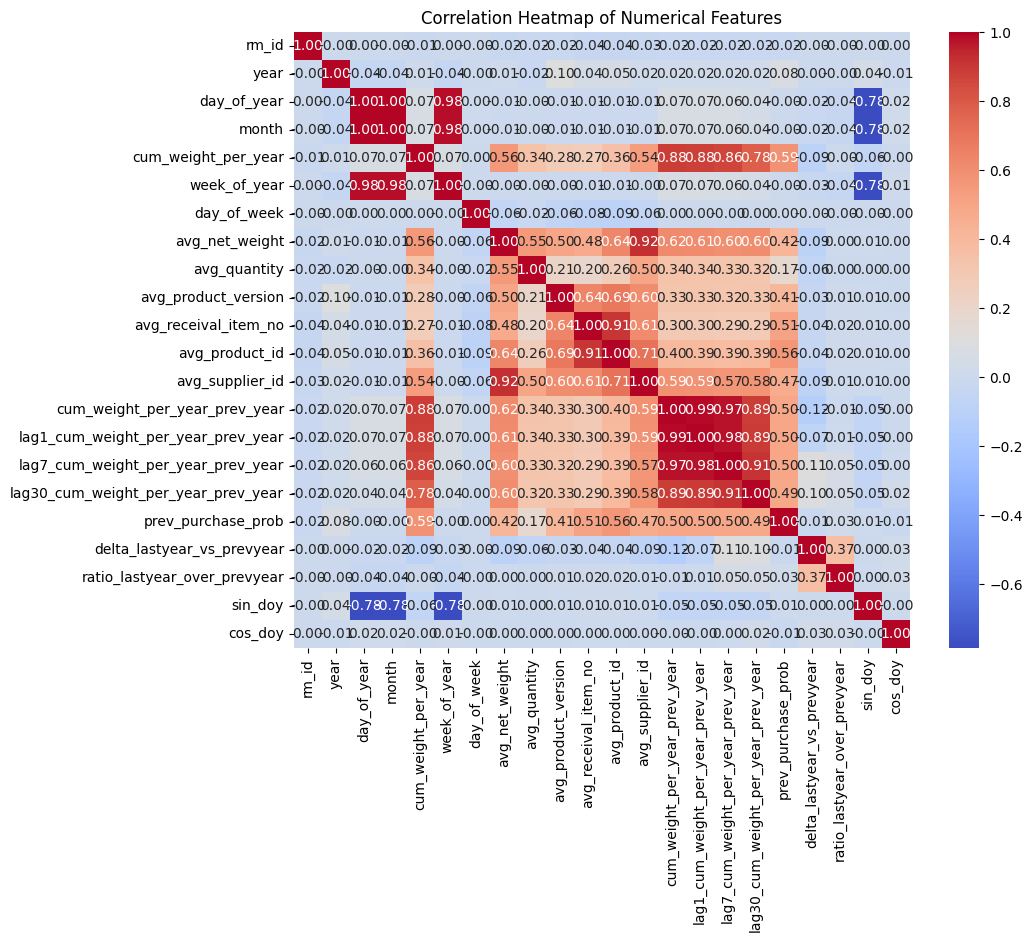

In [22]:
## # correlation heatmap for numerical features
numeric_cols = [col for col in df_model.columns if col != 'date_arrival']
plt.figure(figsize=(10, 8))
correlation_matrix = df_model[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## DROP AVG_GROSS_WEIGHT, AVG_MONTH AND AVG_YEAR

In [23]:
# DROP AVG_GROSS_WEIGHT, AVG_MONTH AND AVG_YEAR
#df_rec_purchase = df_rec_purchase.drop(columns=['avg_gross_weight'])

## AFTER MODEL INTERPRETATION, DROP THESE FEATURES

## DEFINING METRICS AND DATA PREP FOR VALIDATION

In [24]:
# =====================================================
# 1. Imports & Setup
# =====================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform

# =====================================================
# 2. Custom Quantile Error Metric
# =====================================================

class ParticipantVisibleError(Exception):
    """Raise this for participant-facing errors."""
    pass


def quantile_error(actual: np.ndarray, predicted: np.ndarray, q: float = 0.2) -> float:
    """Quantile loss (pinball loss) for quantile q."""
    if np.any(actual < 0) or np.any(predicted < 0):
        raise ParticipantVisibleError("Values must be non-negative.")

    diff = actual - predicted
    return np.mean(np.maximum(q * diff, (q - 1) * diff))


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str = "ID") -> float:
    """Compute 0.2 quantile error between true and predicted weights."""
    for col in [row_id_column_name, 'predicted_weight']:
        if col not in submission.columns:
            raise ParticipantVisibleError(f"Submission is missing column: {col}")
    if not pd.api.types.is_numeric_dtype(submission['predicted_weight']):
        raise ParticipantVisibleError("'predicted_weight' in submission must be numeric.")

    submission_filtered = submission[submission[row_id_column_name].isin(solution[row_id_column_name])]
    merged = pd.merge(solution, submission_filtered, on=row_id_column_name, how='left', validate='one_to_one')

    if merged['predicted_weight'].isnull().any():
        missing_ids = merged.loc[merged['predicted_weight'].isnull(), row_id_column_name].tolist()
        raise ParticipantVisibleError(f"Missing predictions for ID(s): {missing_ids[:5]}")

    actual = merged['weight'].values
    predicted = merged['predicted_weight'].values
    result = quantile_error(actual, predicted, q=0.2)

    if not np.isfinite(result):
        raise ParticipantVisibleError("Final quantile error is not finite.")
    return float(result)


# =====================================================
# 3. Prepare Data
# =====================================================

df = df_model.copy()
df['date_arrival'] = pd.to_datetime(df['date_arrival'], errors='coerce')

target = 'cum_weight_per_year'

base_exclude = [
    'date_arrival', 'day_of_year', 'cum_weight_per_year',
    'avg_product_version', 'avg_product_id', 'avg_quantity',
    'avg_receival_item_no', 'day_of_week', 'avg_supplier_id'
]

# ✅ Build feature list (force include lag feature)
features = [
    col for col in df.columns
    if col not in base_exclude
    #and col not in ['year', 'month', 'day_of_year']
    and col in temporal_cols
] + ['lag1_cum_weight_per_year_prev_year', 'delta_lastyear_vs_prevyear', 'ratio_lastyear_over_prevyear', 'prev_purchase_prob', 'lag7_cum_weight_per_year_prev_year', 'lag30_cum_weight_per_year_prev_year', 'cum_weight_per_year_prev_year']

print(features)

X = df[features]
y = df[target]

# One-hot encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# =====================================================
# 3️⃣ Define Time-Based Train/Validation Split
# =====================================================
df_rec_purchase['date_arrival'] = pd.to_datetime(df_rec_purchase['date_arrival'], errors='coerce')

cutoff_start = pd.Timestamp('2024-01-01')
cutoff_end = pd.Timestamp('2024-12-31')

is_valid = (df_rec_purchase['date_arrival'] >= cutoff_start) & (df_rec_purchase['date_arrival'] <= cutoff_end)
is_train = ~is_valid

# Sample weights: emphasize recent years
sample_weights = np.where(df['year'] == 2024, 5.0,
                  np.where(df['year'] == 2023, 3.0, 1.0))

X_train, y_train, w_train = X[is_train], y[is_train], sample_weights[is_train]
X_valid, y_valid, w_valid = X[is_valid], y[is_valid], sample_weights[is_valid]

print(f"🧩 Train: {len(X_train):,} | Valid: {len(X_valid):,}")
print(f"Train Range: {df_rec_purchase.loc[is_train, 'date_arrival'].min().date()} → {df_rec_purchase.loc[is_train, 'date_arrival'].max().date()}")
print(f"Valid Range: {df_rec_purchase.loc[is_valid, 'date_arrival'].min().date()} → {df_rec_purchase.loc[is_valid, 'date_arrival'].max().date()}")

def quantile_scorer(y_true, y_pred):
    return -quantile_error(y_true, y_pred, q=0.2)  # negative because sklearn maximizes the score

custom_scorer = make_scorer(quantile_scorer, greater_is_better=True)

['year', 'week_of_year', 'sin_doy', 'cos_doy', 'lag1_cum_weight_per_year_prev_year', 'delta_lastyear_vs_prevyear', 'ratio_lastyear_over_prevyear', 'prev_purchase_prob', 'lag7_cum_weight_per_year_prev_year', 'lag30_cum_weight_per_year_prev_year', 'cum_weight_per_year_prev_year']
🧩 Train: 1,274,520 | Valid: 67,260
Train Range: 2005-07-21 → 2023-12-31
Valid Range: 2024-01-01 → 2024-12-19


## RF

In [25]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint, uniform
#import numpy as np
#import pandas as pd

# ---------------------------
# Subset for faster hyperparameter tuning
# ---------------------------
#subset_frac = 0.25  # 25% of training data
#X_tune = X_train.sample(frac=subset_frac, random_state=42)

# Get integer positions of sampled rows
#subset_idx = X_tune.index
#subset_pos = X_train.index.get_indexer(subset_idx)  # ensures correct alignment even for numpy arrays

# Handle y_train safely
#if isinstance(y_train, pd.Series):
    #y_tune = y_train.loc[subset_idx]
#else:
    #y_tune = y_train[subset_pos]

# Handle w_train safely
#if isinstance(w_train, pd.Series):
    #w_tune = w_train.loc[subset_idx]
#else:
    #w_tune = w_train[subset_pos]

# ---------------------------
# Define Random Forest
# ---------------------------
#rf = RandomForestRegressor(random_state=42, n_jobs=-1)

#param_dist_rf = {
    #'n_estimators': randint(100, 500),
    #'max_depth': randint(6, 30),
    #'min_samples_split': randint(2, 15),
    #'min_samples_leaf': randint(1, 8),
    #'max_features': ['sqrt', 'log2'],
    #'bootstrap': [True],
#}

# ---------------------------
# RandomizedSearchCV (subset)
# ---------------------------
#rf_search = RandomizedSearchCV(
    #estimator=rf,
    #param_distributions=param_dist_rf,
    #n_iter=15,
    #scoring=custom_scorer,
    #cv=3,
    #random_state=42,
    #n_jobs=-1,
    #verbose=2
#)

# Fit on subset
#rf_search.fit(X_tune, y_tune, sample_weight=w_tune)

#best_rf = rf_search.best_estimator_
#print("\n✅ Best Random Forest Params (subset tuning):")
#print(rf_search.best_params_)

# ---------------------------
# Refit on full training data
# ---------------------------
#best_rf.set_params(n_estimators=800)  # final number of trees
#best_rf.fit(X_train, y_train, sample_weight=w_train)

# ---------------------------
# Predict + Evaluate
# ---------------------------
#rf_pred = best_rf.predict(X_valid)
#rf_val_score = quantile_error(y_valid.values, rf_pred, q=0.2)
#print(f"✅ Random Forest Validation Quantile Error (q=0.2): {rf_val_score:.5f}")


## XGB

In [27]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform, loguniform

q = 0.2

# =====================================================
# 5️⃣ Subset for tuning (25%)
# =====================================================
subset_frac = 0.25
X_tune = X_train.sample(frac=subset_frac, random_state=42)
subset_idx = X_tune.index
subset_pos = X_train.index.get_indexer(subset_idx)

if isinstance(y_train, pd.Series):
    y_tune = y_train.loc[subset_idx]
else:
    y_tune = y_train[subset_pos]

if isinstance(w_train, pd.Series):
    w_tune = w_train.loc[subset_idx]
else:
    w_tune = w_train[subset_pos]

# =====================================================
# 6️⃣ XGBoost model setup
# =====================================================
xgb = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',   # optimized for CPU
    predictor='auto',
    random_state=42,
    n_jobs=-1
)

param_dist_xgb = {
    'n_estimators': randint(300, 800),
    'learning_rate': loguniform(0.01, 0.15),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'reg_alpha': loguniform(1e-4, 5),
    'reg_lambda': loguniform(1e-3, 5),
    'gamma': uniform(0, 1)
}

# =====================================================
# 7️⃣ Randomized SearchCV on subset
# =====================================================
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=15,
    scoring=custom_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

xgb_search.fit(X_tune, y_tune, sample_weight=w_tune)

best_xgb = xgb_search.best_estimator_
print("\n✅ Best XGBoost Params:")
print(xgb_search.best_params_)

# =====================================================
# 8️⃣ Fit best model on full train (2005–2023)
# =====================================================
best_xgb.fit(X_train, y_train, sample_weight=w_train)

# =====================================================
# 9️⃣ Validation (2024)
# =====================================================
xgb_pred_valid = np.maximum(0, best_xgb.predict(X_valid))
xgb_val_score = quantile_error(y_valid.values, xgb_pred_valid, q=q)

print(f"✅ Validation Quantile Error (q={q}): {xgb_val_score:.5f}")

# =====================================================
# 🔟 Retrain on full data (2005–2024)
# =====================================================
best_xgb.fit(X, y, sample_weight=sample_weights)
print("✅ Retrained on full dataset (2005–2024).")

Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\bupat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\bupat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best XGBoost Params:
{'colsample_bytree': np.float64(0.8123620356542087), 'gamma': np.float64(0.9507143064099162), 'learning_rate': np.float64(0.07259248719561363), 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 402, 'reg_alpha': np.float64(0.012443849002616567), 'reg_lambda': np.float64(0.0023431722468023933), 'subsample': np.float64(0.8377746675897602)}


c:\Users\bupat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Validation Quantile Error (q=0.2): 39132.36244


c:\Users\bupat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Retrained on full dataset (2005–2024).


## LIGHTGBM

In [28]:
import lightgbm as lgb
import numpy as np
import pandas as pd

subset_frac = 0.25
X_train_sub = X_train.sample(frac=subset_frac, random_state=42)

subset_idx = X_train_sub.index
subset_pos = X_train.index.get_indexer(subset_idx)

if isinstance(y_train, pd.Series):
    y_train_sub = y_train.loc[subset_idx]
else:
    y_train_sub = y_train[subset_pos]

if isinstance(w_train, pd.Series):
    w_train_sub = w_train.loc[subset_idx]
else:
    w_train_sub = w_train[subset_pos]

# =====================================================
# 4️⃣ Prepare LightGBM datasets
# =====================================================
lgb_train = lgb.Dataset(X_train_sub, label=y_train_sub, weight=w_train_sub)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, weight=w_valid)

# =====================================================
# 5️⃣ Choose compute device (GPU if available)
# =====================================================
try:
    _ = lgb.train({"device": "gpu", "verbose": -1},
                  lgb.Dataset(np.random.rand(10, 3), label=np.random.rand(10)))
    device_type = "gpu"
except Exception:
    device_type = "cpu"

print(f"⚙️ Training LightGBM on device: {device_type.upper()}")

# =====================================================
# 6️⃣ Define parameters
# =====================================================
lgb_params = {
    'objective': 'quantile',
    'alpha': q,
    'metric': 'quantile',
    'boosting_type': 'gbdt',
    'learning_rate': 0.03,
    'num_leaves': 500,
    'max_depth': 12,
    'min_data_in_leaf': 40,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.05,
    'lambda_l2': 0.1,
    'boost_from_average': False,
    'verbosity': -1,
    'device': device_type
}

# =====================================================
# 7️⃣ Train model (handle version differences)
# =====================================================
import lightgbm
lgb_version = tuple(map(int, lightgbm.__version__.split('.')[:2]))

if lgb_version >= (4, 0):
    callbacks = [
        lgb.early_stopping(stopping_rounds=30, verbose=True),
        lgb.log_evaluation(period=50)
    ]
    lgb_model = lgb.train(
        params=lgb_params,
        train_set=lgb_train,
        num_boost_round=500,
        valid_sets=[lgb_train, lgb_valid],
        callbacks=callbacks
    )
else:
    lgb_model = lgb.train(
        params=lgb_params,
        train_set=lgb_train,
        num_boost_round=500,
        valid_sets=[lgb_train, lgb_valid],
        early_stopping_rounds=30,
        verbose_eval=50
    )

# =====================================================
# 8️⃣ Validation (2024)
# =====================================================
lgb_pred_valid = np.maximum(0, lgb_model.predict(X_valid))
lgb_val_score = quantile_error(y_valid.values, lgb_pred_valid, q=q)

print(f"✅ LightGBM ({device_type.upper()}) Validation Quantile Error (q={q}): {lgb_val_score:.5f}")

# =====================================================
# 9️⃣ Retrain on full dataset (2005–2024)
# =====================================================
# Prepare full training data (2005–2024)
lgb_full = lgb.Dataset(X, label=y, weight=sample_weights)

if lgb_version >= (4, 0):
    lgb_model_full = lgb.train(
        params=lgb_params,
        train_set=lgb_full,
        num_boost_round=lgb_model.best_iteration or 500,
        valid_sets=[lgb_full],
        callbacks=[lgb.log_evaluation(period=100)]
    )
else:
    lgb_model_full = lgb.train(
        params=lgb_params,
        train_set=lgb_full,
        num_boost_round=lgb_model.best_iteration or 500,
        valid_sets=[lgb_full],
        verbose_eval=100
    )

print("✅ LightGBM retrained on full dataset (2005–2024). Ready for 2025 predictions in next cell.")

⚙️ Training LightGBM on device: GPU
Training until validation scores don't improve for 30 rounds
[50]	training's quantile: 33774	valid_1's quantile: 33662.9
[100]	training's quantile: 23594.1	valid_1's quantile: 27153.5
[150]	training's quantile: 17353.7	valid_1's quantile: 24981.4
[200]	training's quantile: 13529.8	valid_1's quantile: 24689.5
[250]	training's quantile: 11464.8	valid_1's quantile: 24656.2
Early stopping, best iteration is:
[233]	training's quantile: 12002.9	valid_1's quantile: 24631.1
✅ LightGBM (GPU) Validation Quantile Error (q=0.2): 24629.48513
[100]	training's quantile: 23695.7


KeyboardInterrupt: 

## ANN

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd

# =====================================================
# 1️⃣ Quantile loss function
# =====================================================
q = 0.2

def quantile_loss(y_pred, y_true, q=q):
    residual = y_true - y_pred
    return torch.mean(torch.max(q * residual, (q - 1) * residual))

def quantile_error(y_true, y_pred, q=q):
    residual = y_true - y_pred
    return np.mean(np.maximum(q * residual, (q - 1) * residual))

# =====================================================
# 2️⃣ MLP model definition
# =====================================================
class QuantileMLP(nn.Module):
    def __init__(self, n_features, hidden=[128, 64]):
        super().__init__()
        layers = []
        in_features = n_features
        for h in hidden:
            layers.append(nn.Linear(in_features, h))
            layers.append(nn.ReLU())
            in_features = h
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

# =====================================================
# 3️⃣ Device setup
# =====================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"⚙️ Using device: {device}")

# =====================================================
# 4️⃣ Subset 25% of training data for faster training (tuning phase)
# =====================================================
subset_frac = 0.25
X_tune = X_train.sample(frac=subset_frac, random_state=42)

# Align y accordingly
if isinstance(y_train, pd.Series):
    y_tune = y_train.loc[X_tune.index]
else:
    y_tune = y_train[X_tune.index]

# Convert validation set
X_valid_t = torch.tensor(X_valid.values, dtype=torch.float32).to(device)
y_valid_t = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1).to(device)

# Convert subset training set
X_train_t = torch.tensor(X_tune.values, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_tune.values, dtype=torch.float32).unsqueeze(1).to(device)

# DataLoaders
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=2048, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_t, y_valid_t), batch_size=2048, shuffle=False)

# =====================================================
# 5️⃣ Initialize model and optimizer
# =====================================================
model_mlp = QuantileMLP(n_features=X_train.shape[1], hidden=[128, 64]).to(device)
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=0.001)

# =====================================================
# 6️⃣ Training loop (10 epochs)
# =====================================================
epochs = 10
for epoch in range(epochs):
    model_mlp.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        loss = quantile_loss(model_mlp(xb), yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {epoch_loss:.5f}")

# =====================================================
# 7️⃣ Validation (2024)
# =====================================================
model_mlp.eval()
with torch.no_grad():
    y_pred_mlp = model_mlp(X_valid_t).cpu().numpy()
y_pred_mlp = np.maximum(0, y_pred_mlp.flatten())

mlp_val_score = quantile_error(y_valid.values, y_pred_mlp, q=q)
print(f"✅ ANN/MLP Validation Quantile Error (q={q}): {mlp_val_score:.5f}")

# =====================================================
# 8️⃣ Retrain on full dataset (2005–2024)
# =====================================================
# Convert all data to tensors
X_full_t = torch.tensor(X.values, dtype=torch.float32).to(device)
y_full_t = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1).to(device)

full_loader = DataLoader(TensorDataset(X_full_t, y_full_t), batch_size=2048, shuffle=True)

# New model for full retraining (fresh start)
model_mlp_full = QuantileMLP(n_features=X.shape[1], hidden=[128, 64]).to(device)
optimizer_full = torch.optim.Adam(model_mlp_full.parameters(), lr=0.001)

epochs_full = 15
for epoch in range(epochs_full):
    model_mlp_full.train()
    running_loss = 0.0
    for xb, yb in full_loader:
        optimizer_full.zero_grad()
        loss = quantile_loss(model_mlp_full(xb), yb)
        loss.backward()
        optimizer_full.step()
        running_loss += loss.item() * xb.size(0)
    epoch_loss = running_loss / len(full_loader.dataset)
    print(f"[Full Retrain] Epoch {epoch+1}/{epochs_full} | Loss: {epoch_loss:.5f}")

print("✅ ANN/MLP retrained on full dataset (2005–2024). Ready for 2025 predictions in next cell.")

⚙️ Using device: cpu
Epoch 1/10 | Train Loss: nan
Epoch 2/10 | Train Loss: nan
Epoch 3/10 | Train Loss: nan
Epoch 4/10 | Train Loss: nan
Epoch 5/10 | Train Loss: nan
Epoch 6/10 | Train Loss: nan
Epoch 7/10 | Train Loss: nan
Epoch 8/10 | Train Loss: nan
Epoch 9/10 | Train Loss: nan
Epoch 10/10 | Train Loss: nan
✅ ANN/MLP Validation Quantile Error (q=0.2): nan
[Full Retrain] Epoch 1/15 | Loss: nan
[Full Retrain] Epoch 2/15 | Loss: nan
[Full Retrain] Epoch 3/15 | Loss: nan
[Full Retrain] Epoch 4/15 | Loss: nan
[Full Retrain] Epoch 5/15 | Loss: nan
[Full Retrain] Epoch 6/15 | Loss: nan
[Full Retrain] Epoch 7/15 | Loss: nan
[Full Retrain] Epoch 8/15 | Loss: nan
[Full Retrain] Epoch 9/15 | Loss: nan
[Full Retrain] Epoch 10/15 | Loss: nan
[Full Retrain] Epoch 11/15 | Loss: nan
[Full Retrain] Epoch 12/15 | Loss: nan
[Full Retrain] Epoch 13/15 | Loss: nan
[Full Retrain] Epoch 14/15 | Loss: nan
[Full Retrain] Epoch 15/15 | Loss: nan
✅ ANN/MLP retrained on full dataset (2005–2024). Ready for 2025

## CHOOSE BEST MODEL

In [ ]:
val_scores = {
    "XGBoost (GPU)": xgb_val_score,
    #"Random Forest (CPU)": rf_val_score,
    "LightGBM (GPU)": lgb_val_score,
    "ANN (GPU)": mlp_val_score,
}

best_model_name = min(val_scores, key=val_scores.get)

if best_model_name == "XGBoost (GPU)":
    final_model = best_xgb
#elif best_model_name == "Random Forest (CPU)":
    #final_model = best_rf
elif best_model_name == "LightGBM (GPU)":
    final_model = lgb_model
else:
    final_model = model_mlp

print(f"\n🏆 Best Model Selected: {best_model_name}")
print(f"Validation Quantile Error: {val_scores[best_model_name]:.5f}")



🏆 Best Model Selected: LightGBM (GPU)
Validation Quantile Error: 24839.95305


## MODEL INTERPRETATION

📊 Displaying LightGBM Feature Importances...


C:\Users\bupat\AppData\Local\Temp\ipykernel_19740\3759108464.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


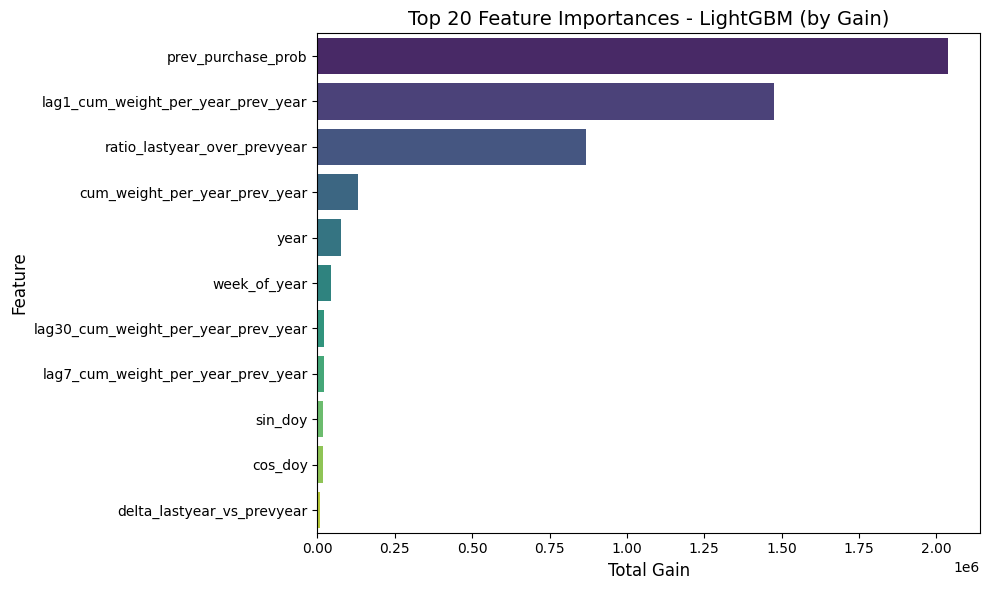

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============================================================
# 🔍 Feature Importance for LightGBM Booster
# ============================================================

# Ensure this only runs if the model is a LightGBM Booster
if isinstance(lgb_model, lgb.Booster):
    print("📊 Displaying LightGBM Feature Importances...")

    # Extract feature importance and names
    importance_df = pd.DataFrame({
        'Feature': lgb_model.feature_name(),
        'Importance': lgb_model.feature_importance(importance_type='gain')  # 'gain' = total info gain
    })

    # Sort descending
    importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title("Top 20 Feature Importances - LightGBM (by Gain)", fontsize=14)
    plt.xlabel("Total Gain", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ The current model is not a LightGBM Booster — skipping feature importance plot.")

In [ ]:
# ============================================================
# 6. Model Interpretation (Feature Importance + PDP)
# ============================================================
#if hasattr(final_model, "feature_importances_"):
    #importances = pd.Series(final_model.feature_importances_, index=X.columns)
    #top_importances = importances.sort_values(ascending=False).head(20)

    #plt.figure(figsize=(10, 6))
    #sns.barplot(x=top_importances.values, y=top_importances.index)
    #plt.title(f"Top 20 Feature Importances - {best_model_name}")
    #plt.tight_layout()
    #plt.show()

    #top_features = top_importances.index[:3]
    #print(f"Plotting PDPs for: {list(top_features)}")
    #PartialDependenceDisplay.from_estimator(final_model, X, features=top_features)
    #plt.show()

## PREDICTIONS

In [ ]:
import pandas as pd
import numpy as np

# ============================================================
# 🧠 0️⃣ Ensure trained model exists
# ============================================================
try:
    model = final_model
except NameError:
    if 'best_xgb' in globals():
        model = best_xgb
    #elif 'best_rf' in globals():
        #model = best_rf
    elif 'lgb_model' in globals():
        model = lgb_model
    else:
        raise NameError("❌ No trained model found. Run training first.")

pm_df = prediction_mapping.copy()

# --- Ensure date type ---
pm_df['forecast_end_date'] = pd.to_datetime(pm_df['forecast_end_date'], errors='coerce')

# --- Core calendar breakdown ---
pm_df['year'] = pm_df['forecast_end_date'].dt.year
pm_df['month'] = pm_df['forecast_end_date'].dt.month
pm_df['week_of_year'] = pm_df['forecast_end_date'].dt.isocalendar().week.astype(int)
pm_df['day_of_week'] = pm_df['forecast_end_date'].dt.dayofweek
pm_df['day_of_year'] = pm_df['forecast_end_date'].dt.dayofyear
pm_df['rm_id'] = pm_df['rm_id'].astype(str)

# ============================================================
# 🧭 Cyclical encodings for seasonality
# ============================================================
pm_df['sin_doy'] = np.sin(2 * np.pi * pm_df['day_of_year'] / 365)
pm_df['cos_doy'] = np.cos(2 * np.pi * pm_df['day_of_year'] / 365)

# ============================================================
# ✅ Summary check
# ============================================================
temporal_cols = ['year', 'week_of_year',
    'sin_doy', 'cos_doy'
]

print(f"✅ Prediction mapping (2025): {pm_df.shape}")
print(f"🧩 Added {len(temporal_cols) - 1} temporal features.")
display(pm_df[temporal_cols].head(10))

✅ Prediction mapping (2025): (30450, 11)
🧩 Added 3 temporal features.


,year,week_of_year,sin_doy,cos_doy
0,2025,1,0.034422,0.999407
1,2025,1,0.051620,0.998667
2,2025,1,0.068802,0.997630
3,2025,1,0.085965,0.996298
4,2025,2,0.103102,0.994671
5,2025,2,0.120208,0.992749
6,2025,2,0.137279,0.990532
7,2025,2,0.154309,0.988023
8,2025,2,0.171293,0.985220
9,2025,2,0.188227,0.982126


In [ ]:
# ============================================================
# 2️⃣ Prepare base dataset (2023–2024 only)
# ============================================================
df_feat = df_rec_purchase[df_rec_purchase['year'].isin([2023, 2024])].copy()
df_feat['date_arrival'] = pd.to_datetime(df_feat['date_arrival'], errors='coerce')
df_feat['rm_id'] = df_feat['rm_id'].astype(str)
df_feat['week_of_year'] = df_feat['date_arrival'].dt.isocalendar().week.astype(int)
df_feat['day_of_week'] = df_feat['date_arrival'].dt.dayofweek
df_feat = df_feat.sort_values(['rm_id', 'year', 'week_of_year', 'day_of_week'])

print("✅ df_feat (2023–2024):", df_feat.shape)
df_feat.head()

✅ df_feat (2023–2024): (136800, 32)


,rm_id,date_arrival,year,day_of_year,month,net_weight,quantity,product_version,receival_item_no,product_id,...,lag7_cum_weight_per_year_prev_year,lag30_cum_weight_per_year_prev_year,prev_purchase_prob,days_with_purchase,total_days,delta_lastyear_vs_prevyear,ratio_lastyear_over_prevyear,quarter,sin_doy,cos_doy
231843,1842.0,2023-01-02,2023,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,NaN,1,0.034422,0.999407
231844,1842.0,2023-01-03,2023,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,NaN,1,0.051620,0.998667
231845,1842.0,2023-01-04,2023,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,NaN,1,0.068802,0.997630
231846,1842.0,2023-01-05,2023,5,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,NaN,1,0.085965,0.996298
231847,1842.0,2023-01-06,2023,6,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,NaN,1,0.103102,0.994671


In [ ]:
# ============================================================
# 3️⃣ Compute lag features (2024 only)
# ============================================================
df_2024 = df_feat[df_feat['year'] == 2024].copy()

# --- Drop any old duplicate columns before computing ---
df_2024 = df_2024.loc[:, ~df_2024.columns.duplicated()].copy()

# --- Compute lags grouped by rm_id ---
for lag in [1, 7, 30]:
    df_2024[f'lag{lag}_cum_weight_per_year_prev_year'] = (
        df_2024.groupby('rm_id')['cum_weight_per_year'].shift(lag)
    )

# --- Remove any existing cum_weight_per_year_prev_year before renaming ---
if 'cum_weight_per_year_prev_year' in df_2024.columns:
    df_2024 = df_2024.drop(columns=['cum_weight_per_year_prev_year'])

# --- Rename current year's cum_weight for clarity ---
df_2024 = df_2024.rename(columns={
    'cum_weight_per_year': 'cum_weight_per_year_prev_year'
})

# --- Keep only what we need for lag map ---
lag_map_2024 = (
    df_2024[[
        'rm_id',
        'week_of_year',
        'day_of_week',
        'cum_weight_per_year_prev_year',
        'lag1_cum_weight_per_year_prev_year',
        'lag7_cum_weight_per_year_prev_year',
        'lag30_cum_weight_per_year_prev_year'
    ]]
    .drop_duplicates()
    .reset_index(drop=True)
)

print(f"✅ lag_map_2024 created successfully: {lag_map_2024.shape}")
print(lag_map_2024.head(10))


✅ lag_map_2024 created successfully: (67260, 7)
    rm_id  week_of_year  day_of_week  cum_weight_per_year_prev_year  \
0  1842.0             1            0                            0.0   
1  1842.0             1            1                            0.0   
2  1842.0             1            2                            0.0   
3  1842.0             1            3                            0.0   
4  1842.0             1            4                            0.0   
5  1842.0             1            5                            0.0   
6  1842.0             1            6                            0.0   
7  1842.0             2            0                            0.0   
8  1842.0             2            1                            0.0   
9  1842.0             2            2                            0.0   

   lag1_cum_weight_per_year_prev_year  lag7_cum_weight_per_year_prev_year  \
0                                 NaN                                 NaN   
1               

In [ ]:
# ============================================================
# 4️⃣ 2-year averages (2023 + 2024)
# ============================================================
avg_features_df = (
    df_feat.groupby(['rm_id', 'week_of_year', 'day_of_week'], as_index=False)
    .agg({
        'quantity': 'mean',
        'net_weight': 'mean',
        'receival_item_no': 'mean',
        'supplier_id': 'mean',
    })
)
avg_features_df = avg_features_df.rename(columns={
    'quantity': 'avg_quantity',
    'net_weight': 'avg_net_weight',
    'receival_item_no': 'avg_receival_item_no',
    'supplier_id': 'avg_supplier_id',
})

print("✅ avg_features_df:", avg_features_df.shape)
avg_features_df.head()


✅ avg_features_df: (69160, 7)


,rm_id,week_of_year,day_of_week,avg_quantity,avg_net_weight,avg_receival_item_no,avg_supplier_id
0,1842.0,1,0,0.0,0.0,0.0,0.0
1,1842.0,1,1,0.0,0.0,0.0,0.0
2,1842.0,1,2,0.0,0.0,0.0,0.0
3,1842.0,1,3,0.0,0.0,0.0,0.0
4,1842.0,1,4,0.0,0.0,0.0,0.0


In [ ]:
# ============================================================
# 5️⃣ Previous purchase probability (Oct–Dec 2024)
# ============================================================
df_prob = df_rec_purchase.copy()
df_prob['date_arrival'] = pd.to_datetime(df_prob['date_arrival'], errors='coerce')
df_prob['year'] = df_prob['date_arrival'].dt.year
df_prob['month'] = df_prob['date_arrival'].dt.month
df_prob['rm_id'] = df_prob['rm_id'].astype(str)
df_prob['purchase_flag'] = (df_prob['net_weight'] > 0).astype(int)

df_prob_oct_dec = df_prob[(df_prob['year'] == 2024) & (df_prob['month'].isin([10, 11, 12]))]
purchase_prob_df = (
    df_prob_oct_dec.groupby('rm_id', as_index=False)
    .agg(
        days_with_purchase=('purchase_flag', 'sum'),
        total_days=('date_arrival', 'nunique')
    )
)
purchase_prob_df['prev_purchase_prob'] = (
    purchase_prob_df['days_with_purchase'] / purchase_prob_df['total_days']
)

print("✅ purchase_prob_df:", purchase_prob_df.shape)
purchase_prob_df.head()

✅ purchase_prob_df: (190, 4)


,rm_id,days_with_purchase,total_days,prev_purchase_prob
0,1842.0,0,80,0.0
1,1843.0,0,80,0.0
2,1844.0,0,80,0.0
3,1845.0,0,80,0.0
4,1846.0,0,80,0.0


In [ ]:
# ============================================================
# 6️⃣ Combine all feature sets (2023–2024)
# ============================================================

# --- 1️⃣ Standardize key dtypes across all DataFrames ---
for df in [avg_features_df, lag_map_2024]:
    df['rm_id'] = (
        df['rm_id']
        .astype(str)
        .str.replace('.0', '', regex=False)
        .str.strip()
    )
    df['week_of_year'] = df['week_of_year'].astype(int)
    df['day_of_week'] = df['day_of_week'].astype(int)

purchase_prob_df['rm_id'] = (
    purchase_prob_df['rm_id']
    .astype(str)
    .str.replace('.0', '', regex=False)
    .str.strip()
)

# --- 2️⃣ Restrict avg_features_df to keys that exist in lag_map_2024 ---
valid_keys = lag_map_2024[['rm_id', 'week_of_year', 'day_of_week']].drop_duplicates()
avg_features_df = avg_features_df.merge(
    valid_keys,
    on=['rm_id', 'week_of_year', 'day_of_week'],
    how='inner'
)

print(f"✅ Key alignment check:")
print(f"   avg_features_df: {len(avg_features_df):,} rows")
print(f"   lag_map_2024: {len(lag_map_2024):,} rows")

# --- 3️⃣ Merge avg + lag features (same keys) ---
features_df = avg_features_df.merge(
    lag_map_2024,
    on=['rm_id', 'week_of_year', 'day_of_week'],
    how='left'
)

# --- 4️⃣ Add prev_purchase_prob (by rm_id only) ---
features_df = features_df.merge(
    purchase_prob_df[['rm_id', 'prev_purchase_prob']],
    on='rm_id',
    how='left'
)

# --- 5️⃣ Compute delta and ratio directly inside features_df ---
required_cols = ['lag7_cum_weight_per_year_prev_year', 'cum_weight_per_year_prev_year']
missing = [c for c in required_cols if c not in features_df.columns]
if missing:
    raise KeyError(f"Missing required columns in features_df: {missing}")

# Compute delta (difference between 7-day lag and actual previous-year cumulative)
features_df['delta_lastyear_vs_prevyear'] = (
    features_df['lag7_cum_weight_per_year_prev_year'] -
    features_df['cum_weight_per_year_prev_year']
)

# Compute ratio (relative deviation)
features_df['ratio_lastyear_over_prevyear'] = np.where(
    features_df['cum_weight_per_year_prev_year'] != 0,
    features_df['lag7_cum_weight_per_year_prev_year'] / features_df['cum_weight_per_year_prev_year'],
    np.nan
)

# --- 6️⃣ Final consistency checks ---
missing_lags = features_df['lag7_cum_weight_per_year_prev_year'].isna().sum()
print(f"✅ features_df (combined): {features_df.shape}")
print(f"✅ Missing lag7 values after merge: {missing_lags:,}")
print(f"✅ Added delta_lastyear_vs_prevyear and ratio_lastyear_over_prevyear")


# Preview
print(features_df[
    ['rm_id', 'week_of_year', 'day_of_week',
     'lag1_cum_weight_per_year_prev_year', 'cum_weight_per_year_prev_year',
     'lag7_cum_weight_per_year_prev_year','lag30_cum_weight_per_year_prev_year',
     'delta_lastyear_vs_prevyear', 'ratio_lastyear_over_prevyear']
].head(10))

✅ Key alignment check:
   avg_features_df: 67,260 rows
   lag_map_2024: 67,260 rows
✅ features_df (combined): (67260, 14)
✅ Missing lag7 values after merge: 1,330
✅ Added delta_lastyear_vs_prevyear and ratio_lastyear_over_prevyear
  rm_id  week_of_year  day_of_week  lag1_cum_weight_per_year_prev_year  \
0  1842             1            0                                 NaN   
1  1842             1            1                                 0.0   
2  1842             1            2                                 0.0   
3  1842             1            3                                 0.0   
4  1842             1            4                                 0.0   
5  1842             1            5                                 0.0   
6  1842             1            6                                 0.0   
7  1842             2            0                                 0.0   
8  1842             2            1                                 0.0   
9  1842             2        

In [ ]:
# ============================================================
# 7️⃣ Merge computed features into 2025 prediction mapping
# ============================================================

# Ensure keys have consistent dtypes
for df in [pm_df, features_df]:
    df['rm_id'] = (
        df['rm_id']
        .astype(str)
        .str.replace('.0', '', regex=False)
        .str.strip()
    )
    df['week_of_year'] = df['week_of_year'].astype(int)
    df['day_of_week'] = df['day_of_week'].astype(int)

# Merge by rm_id + week_of_year + day_of_week (no forward fill)
pred_df = pm_df.merge(
    features_df,
    on=['rm_id', 'week_of_year', 'day_of_week'],
    how='left'
)

# Fill missing numeric feature values with zero
num_cols = pred_df.select_dtypes(include=[np.number]).columns
#pred_df[num_cols] = pred_df[num_cols].fillna(0)

print(f"✅ pred_df after merging and filling: {pred_df.shape}")
print(f"   Remaining NaN values (should be 0): {pred_df.isna().sum().sum()}")

# Quick check of sample rows
pred_df.head(10)

✅ pred_df after merging and filling: (30450, 22)
   Remaining NaN values (should be 0): 51077


,ID,rm_id,forecast_start_date,forecast_end_date,year,month,week_of_year,day_of_week,day_of_year,sin_doy,...,avg_net_weight,avg_receival_item_no,avg_supplier_id,cum_weight_per_year_prev_year,lag1_cum_weight_per_year_prev_year,lag7_cum_weight_per_year_prev_year,lag30_cum_weight_per_year_prev_year,prev_purchase_prob,delta_lastyear_vs_prevyear,ratio_lastyear_over_prevyear
0,1,365,2025-01-01,2025-01-02,2025,1,1,3,2,0.034422,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
1,2,365,2025-01-01,2025-01-03,2025,1,1,4,3,0.051620,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
2,3,365,2025-01-01,2025-01-04,2025,1,1,5,4,0.068802,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
3,4,365,2025-01-01,2025-01-05,2025,1,1,6,5,0.085965,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
4,5,365,2025-01-01,2025-01-06,2025,1,2,0,6,0.103102,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
5,6,365,2025-01-01,2025-01-07,2025,1,2,1,7,0.120208,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
6,7,365,2025-01-01,2025-01-08,2025,1,2,2,8,0.137279,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
7,8,365,2025-01-01,2025-01-09,2025,1,2,3,9,0.154309,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
8,9,365,2025-01-01,2025-01-10,2025,1,2,4,10,0.171293,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
9,10,365,2025-01-01,2025-01-11,2025,1,2,5,11,0.188227,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN


In [ ]:
# ============================================================
# 8️⃣ Align features for model
# ============================================================
if hasattr(model, "feature_name"):
    model_features = list(model.feature_name())
elif hasattr(model, "feature_names_in_"):
    model_features = list(model.feature_names_in_)
elif hasattr(model, "get_booster"):
    model_features = list(model.get_booster().feature_names)
else:
    model_features = list(X_train.columns)

for f in model_features:
    if f not in pred_df.columns:
        pred_df[f] = np.nan

X_pred = pred_df[model_features].apply(pd.to_numeric, errors='coerce')

print("✅ Model features found:", len(model_features))
print("Missing values per feature:\n", X_pred.isna().sum())


✅ Model features found: 11
Missing values per feature:
 year                                       0
week_of_year                               0
sin_doy                                    0
cos_doy                                    0
lag1_cum_weight_per_year_prev_year      1950
delta_lastyear_vs_prevyear              2710
ratio_lastyear_over_prevyear           24927
prev_purchase_prob                      1950
lag7_cum_weight_per_year_prev_year      2710
lag30_cum_weight_per_year_prev_year     7080
cum_weight_per_year_prev_year           1950
dtype: int64


In [ ]:
# ============================================================
# 9️⃣ Predict cum_weight_year directly
# ============================================================
pred_df['predicted_weight'] = np.maximum(0, model.predict(X_pred))

# ============================================================
# 🔟 Mask week 1 of 2025
# ============================================================
mask_week1_2025 = (pred_df['year'] == 2025) & (pred_df['week_of_year'] == 1)
pred_df.loc[mask_week1_2025, 'predicted_weight'] = 0

# ============================================================
# 🏁 Save Final Submission
# ============================================================
submission = pred_df[['ID', 'predicted_weight']].drop_duplicates(subset=['ID']).sort_values(by='ID')
submission.to_csv("submission_2025_predictions_cumweightyear.csv", index=False)

print("✅ Final 2025 predictions ready!")
print("Submission shape:", submission.shape)
submission.head()

✅ Final 2025 predictions ready!
Submission shape: (30450, 2)


,ID,predicted_weight
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [ ]:
#import pandas as pd
#import numpy as np

# ============================================================
# Ensure trained model exists
# ============================================================
#try:
    #model = final_model
#except NameError:
    #if 'best_xgb' in globals():
        #model = best_xgb
    #elif 'best_rf' in globals():
        #model = best_rf
    #else:
        #raise NameError("No trained model found. Run training first.")

# ============================================================
# 1️⃣ Prepare prediction mapping
# ============================================================
#pm_df = prediction_mapping.copy()
#pm_df['forecast_end_date'] = pd.to_datetime(pm_df['forecast_end_date'], errors='coerce')
#pm_df['month'] = pm_df['forecast_end_date'].dt.month
#pm_df['day_of_week'] = pm_df['forecast_end_date'].dt.weekday  # Monday=0
#pm_df['week_of_year'] = pm_df['forecast_end_date'].dt.isocalendar().week.astype(int)
#pm_df['year'] = pm_df['forecast_end_date'].dt.year

# ============================================================
# 2️⃣ Compute 2-year rolling features from 2023–2024
# ============================================================
#rolling_features = ['net_weight', 'quantity', 'supplier_id']
#df_rolling = df_rec_purchase[df_rec_purchase['year'].isin([2023, 2024])].copy()

#roll2yr_df = (
    #df_rolling
    #.groupby(['rm_id', 'week_of_year', 'day_of_week'])[rolling_features]
    #.mean()
    #.reset_index()
#)
#roll2yr_df = roll2yr_df.rename(columns={c: f'roll2yr_{c}' for c in rolling_features})

# ============================================================
# 3️⃣ Extract avg features and purchase_prob
# ============================================================
#avg_features = [c for c in df_rec_purchase.columns if c.startswith('avg_')]
#purchase_prob_df = df_rec_purchase[['rm_id', 'purchase_prob']].drop_duplicates(subset=['rm_id'])

#rm_features_df = df_rec_purchase[['rm_id', 'week_of_year', 'day_of_week'] + avg_features].drop_duplicates()
#rm_features_df = rm_features_df.merge(purchase_prob_df, on='rm_id', how='left')
#rm_features_df = rm_features_df.merge(roll2yr_df, on=['rm_id', 'week_of_year', 'day_of_week'], how='left')

# ============================================================
# 4️⃣ Keep only combinations that existed in 2024
# ============================================================
#valid_2024 = df_rec_purchase.loc[
    #df_rec_purchase['year'] == 2024,
    #['rm_id', 'week_of_year', 'day_of_week']
#].drop_duplicates()
#rm_features_df = rm_features_df.merge(valid_2024, on=['rm_id', 'week_of_year', 'day_of_week'], how='inner')

# ============================================================
# 5️⃣ Merge features into prediction mapping
# ============================================================
#pred_df = pm_df.merge(rm_features_df, on=['rm_id', 'week_of_year', 'day_of_week'], how='left')

# ============================================================
# 6️⃣ Align feature order exactly as in training
# ============================================================
#required_features = model.feature_names_in_
#for c in required_features:
    #if c not in pred_df.columns:
        #pred_df[c] = 0
#X_pred = pred_df[required_features].fillna(0)

# ============================================================
# 7️⃣ Predict Net Weight
# ============================================================
#pred_df['predicted_net_weight'] = model.predict(X_pred)
#pred_df['predicted_net_weight'] = np.maximum(0, pred_df['predicted_net_weight'])

# ============================================================
# 8️⃣ Random selection of active weekdays per RM_ID/month
# ============================================================
# Compute active weekdays in 2024 per RM_ID/month
#active_2024 = (
    #df_rec_purchase.loc[
        #(df_rec_purchase['year'] == 2024) &
        #(df_rec_purchase['day_of_week'] < 5)
    #]
    #.assign(month=lambda df: df['date_arrival'].dt.month)
    #.groupby(['rm_id', 'month'])['day_of_week']
    #.nunique()
    #.reset_index(name='active_days_2024')
#)

# Determine target number of days to predict (e.g., 60% of active days)
#active_2024['target_days_2025'] = np.ceil(active_2024['active_days_2024'] * 0.9)

# Initialize flag
#pred_df['predict_flag'] = False

# Apply random selection per RM_ID/month
#for (rm, month), group in pred_df.groupby(['rm_id', 'month']):
    #weekday_idx = group.index[group['day_of_week'] < 5].to_numpy()
    
    # Skip if no weekdays
    #if len(weekday_idx) == 0:
        #continue
    
    #target_n = active_2024.loc[
        #(active_2024['rm_id'] == rm) & (active_2024['month'] == month),
        #'target_days_2025'
    #].values
    #if len(target_n) == 0:
        #continue
    #target_n = int(target_n[0])  # cast to integer
    
    #if len(weekday_idx) <= target_n:
        #chosen_idx = weekday_idx
    #else:
        #chosen_idx = np.random.choice(weekday_idx, size=target_n, replace=False)
    
    #pred_df.loc[chosen_idx, 'predict_flag'] = True

# ============================================================
# 9️⃣ Force zeros for invalid predictions
# ============================================================
#before_week2_mask = pred_df['week_of_year'] < 2
#unseen_mask = ~pred_df['rm_id'].isin(df_rec_purchase['rm_id'])
#weekend_mask = pred_df['day_of_week'] >= 5
#not_chosen_mask = ~pred_df['predict_flag']
#invalid_combo_mask = ~pred_df.set_index(['rm_id', 'week_of_year', 'day_of_week']).index.isin(
    #valid_2024.set_index(['rm_id', 'week_of_year', 'day_of_week']).index
#)

#pred_df.loc[
    #before_week2_mask | unseen_mask | weekend_mask | invalid_combo_mask | not_chosen_mask,
    #'predicted_net_weight'
#] = 0

# ============================================================
# 🔟 Compute cumulative sum per RM_ID
# ============================================================
#pred_df = pred_df.sort_values(['rm_id', 'week_of_year', 'day_of_week'])
#pred_df['predicted_weight'] = pred_df.groupby('rm_id')['predicted_net_weight'].cumsum()

# ============================================================
# 1️⃣1️⃣ Build Final Submission
# ============================================================
#submission = pred_df[['ID', 'predicted_weight']].copy().sort_values(by='ID')
#submission.to_csv("submission_2025_predictions_cumsum_random_weekdays.csv", index=False)

#print("✅ Cumulative predictions for 2025 with random weekdays ready!")
#print(submission.head())